# **Capstone Project | Interim Submission:** Automatic Ticket Assignment

This report submission is done by the team Group 9B comprising of Rohit Bhat/ Swayam P Behera / Sridhar Krishnan / Gagandeeep Kaur

# **01. Introduction:** Problem Statement, Business Case and Project Description

##**1.1 Problem Statement**

One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations.IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business.The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact.In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring
systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organizations. 

Manual Ticket Assignment is :

1.   time consuming
2.   error prone
2.   results in effective utlization of resources



## **1.2 Business Case**
The workflow used for incident resolution should be as time-effective as possible. In an ideal scenario, when a new incident is reported, it is immediately assigned to the most relevant and the least occupied IT personnel based on the priority of the incident report. However, current solutions heavily rely on a service desk team (usually a combination of L1/L2) that evaluates the importance of each incident reported and attempts to assign them to the relevant L3 Teams in case during the initial diagnosis they find that they can not solve the same themselves. This solution creates an unnecessary overhead that takes up resources (man-hours) which could be used more efficiently.

Hence the need for AI/ML based solution that can automate assigning of tickets to appropriate teams and there by elimiate the need for any manual intervention. 

The potential benefits of this solution are:


1.   process automation and removal of manual intervention
2.   improved turnaround time for resolution as tickets are assigned to respective teams upfront automatically
1.   enhanced resource utilization



## **1.3 Project Description**

In this project we are given a dump of ticketing system that contains summary and detailed descrption of the issue, user who raised the issue and the group to which the ticket is assigned. The goal is to create a AI/ML based Automatic Ticket Assignment model ( based on the given dataset) that can automatically classify the incoming tickets into appropriate groups for assignment.

Known challenges / limitations:


1.   quality of the model is largely dependent on the quality of the dataset and hence any inconsistencies and vagueness inherent in the data (that cannot be cleaned by AI/ML techniques) will have a bearing on the quality of the output  
2.   the model is based on supervised technique and hence is largely based on information provided. Hence it may not have referrence to ticket priority / severity etc. that are not provided as input for this purpose





# **02. Set up:** Installing dependencies, importing libraries, setting up folders and loading the dataset

## 2.1 Setting up folder and Installing dependencies

In [0]:
%tensorflow_version 2.x

In [0]:
import os

# libraries for mounting google drive for using GC

from google.colab import drive

In [0]:
# mounting the drive on Google Colab

drive.mount('/content/drive')

# changing the directory to point to project folder

os.chdir('/content/drive/My Drive/AIML/Projects/Capstone')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# installing apex (from github) for transformer models

!sh setup.sh

Cloning into 'apex'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 6777 (delta 17), reused 8 (delta 5), pack-reused 6745
Receiving objects: 100% (6777/6777), 13.76 MiB | 10.79 MiB/s, done.
Resolving deltas: 100% (4523/4523), done.
Checking out files: 100% (267/267), done.
Created temporary directory: /tmp/pip-ephem-wheel-cache-djrjff4x
Created temporary directory: /tmp/pip-req-tracker-y5_q3wbl
Created requirements tracker '/tmp/pip-req-tracker-y5_q3wbl'
Created temporary directory: /tmp/pip-install-1m56wfye
Processing /content/drive/My Drive/AIML/Projects/Capstone/apex
  Created temporary directory: /tmp/pip-req-build-ax0rf8vb
  Added file:///content/drive/My%20Drive/AIML/Projects/Capstone/apex to build tracker '/tmp/pip-req-tracker-y5_q3wbl'
    Running setup.py (path:/tmp/pip-req-build-ax0rf8vb/setup.py) egg_info for package from file:///content/drive/My%20Drive/AIML/Projects/Capst

In [0]:
# installing environment dependencies

In [0]:
pip install -r requirements.txt

     |████████████████████████████████| 122kB 8.7MB/s 
     |████████████████████████████████| 890kB 8.6MB/s 
     |████████████████████████████████| 1.1MB 29.7MB/s 
     |████████████████████████████████| 194kB 55.6MB/s 
     |████████████████████████████████| 204kB 59.8MB/s 
     |████████████████████████████████| 3.8MB 55.2MB/s 
     |████████████████████████████████| 645kB 58.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=7c70e4bfe64713fb2c1d083106d048ec6b0279b7e28e142e817f02511de8f95b
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=27a3dbe6acb5ccafed6e1f6e7809add5b3b9910553d831c7af63671f7c28d195
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
Successfully built sacremoses seqeval
  Found existing installation: qtconsole 4.7

In [0]:
### importing all relevant libraries

import warnings
warnings.filterwarnings('ignore')

# libraries for basic utility functions , array / dataframes handling 

import time
import numpy as np
import pandas as pd


# libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# libraries for text processing

from itertools import groupby
import re
from bs4 import BeautifulSoup
import nltk


# libraries for preprocessing, model building, and evaluation 

import tensorflow as tf
print ('Tensorflow version:',tf.__version__)
from tensorflow.keras.backend import clear_session
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Flatten,LSTM, Embedding, Dropout, Bidirectional, GlobalMaxPool1D,SpatialDropout1D,GRU
from tensorflow.keras.layers import  Conv1D,Conv2D, Reshape, MaxPooling1D,MaxPool2D,Concatenate,Activation,GlobalAveragePooling1D,GlobalMaxPooling1D
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from tensorflow import random

import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,LabelEncoder,LabelBinarizer
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.utils import class_weight

# libraries for transformers based models

from simpletransformers.classification import ClassificationModel

Tensorflow version: 2.2.0


In [0]:
# populating requirements.txt for dependencies installation

In [0]:
pip freeze > requirements.txt

## 2.2 Loading the dataset

In [0]:
# loading the data file 

source_file = 'input_data.xlsx'
rawdata = pd.read_excel(source_file,sheet_name='Sheet1', index_col=None, header=0)

# printing first few rows to review the data

rawdata.head(5)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


Observation:

1.   First 3 columns are features and last column 'Assigment Group' is the target labels.
2.   Each row seems to relate to one ticket though ticket number is not given as a column.
1.   The data set gives 'short description', (detailed) 'description' and 'caller' who raised the ticket along with the 'assignment_group' to which the ticket is assigned . 


# **03. Milestone 1:** EDA, Data Visualization and Pre-Processing

## 3.1 Analyzing the dataset

In [0]:
# understanding column datatypes , number of columns,rows 

rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


Observation:

1.   There are 8500 records of data in total with few null values in 'Short Description' and 'Description' features.
1.   All the columns are tagged as 'object' as they have mix of numbers and alphabets.These will be tagged appropriately as part of the analysis.



In [0]:
# EDA for all attributes 

rawdata.describe(include='all')

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


Observation:

1.   There are 74 unique assignment group values hence there are 74 label values to be classified from. This is multiclass classification problem statement.
1.   Out of 8500 records , 3976 records pertain to 'GRP_0' assignment group. This suggests that data is imbalanced.
2.   Only 2950 callers represent the total 8500 tickets. Which means on an average one caller has raised three tickets.
3.   The most common word in' Short description' is "password reset" & in 'Description' it is "the"
4.   Caller 'bpctwhsn kzqsbmtp' is the one with most number of tickets (810)


####3.1.1 Analysis of Label ' Assigment Group'

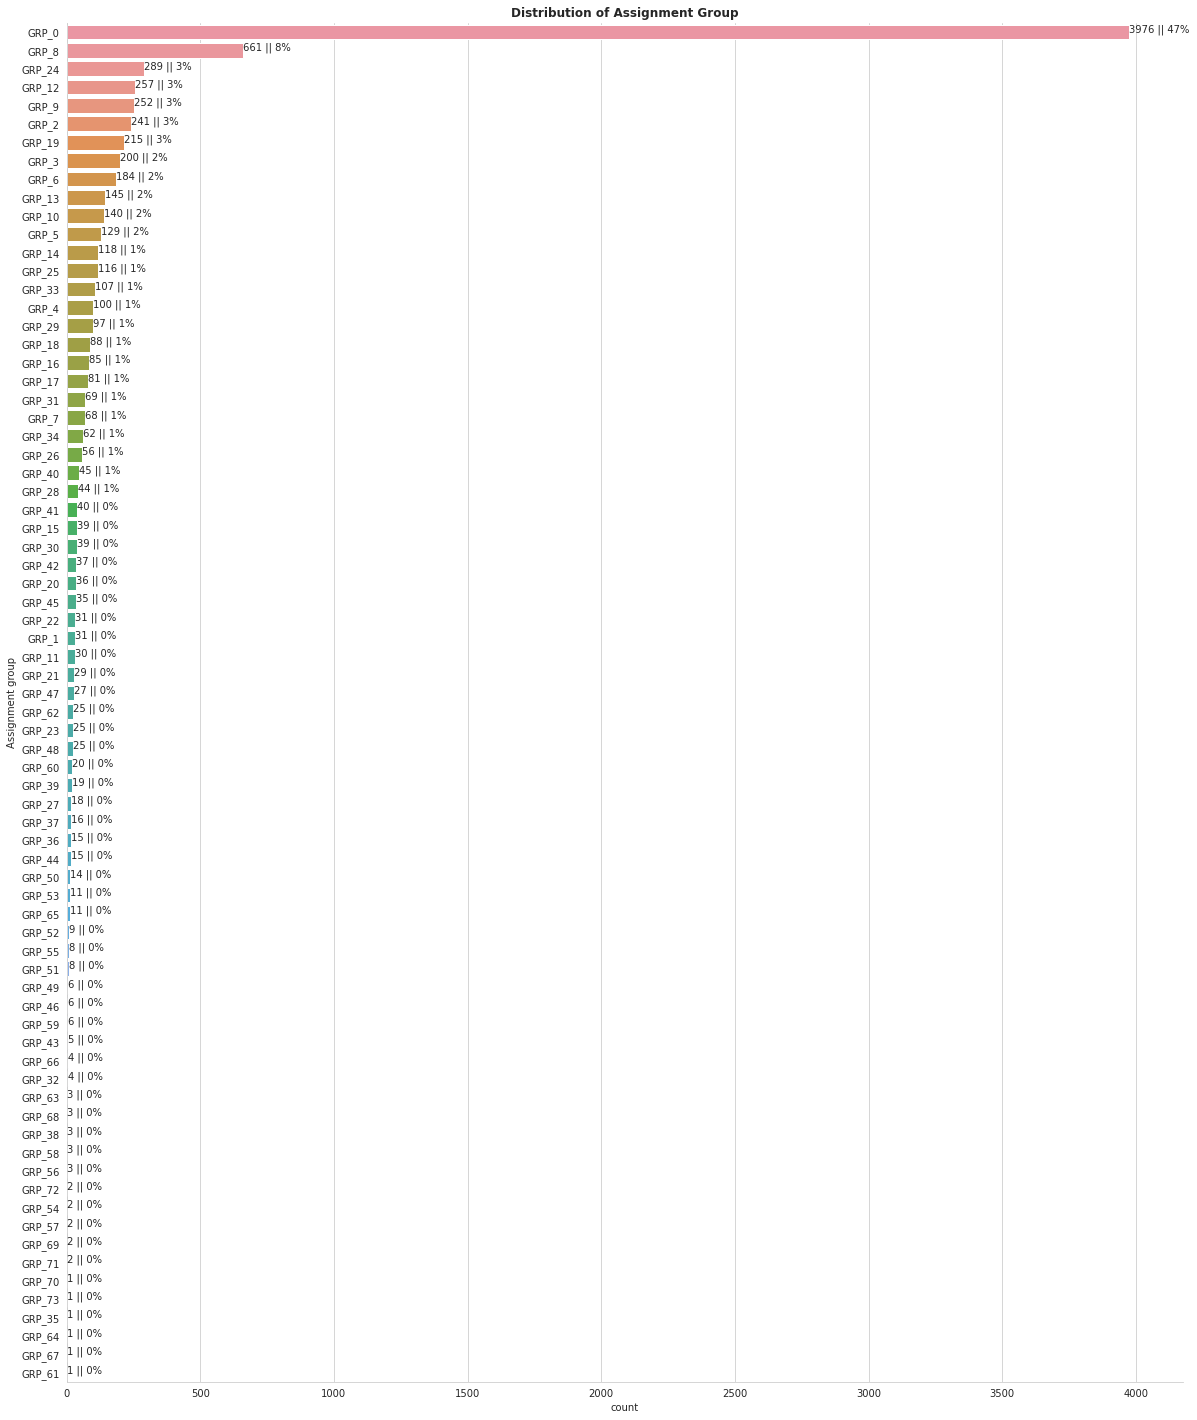

In [0]:
# creating countplot for the target label:'Assignment Group' 

curattr = 'Assignment group'
plt.figure(figsize=(20,25))
plt.title('Distribution of Assignment Group', fontweight='bold')
g=sns.countplot(data=rawdata,y=curattr,order=rawdata[curattr].value_counts().index)
sns.despine()
total=len(rawdata[curattr])

# annotating the plot to show absolute value and % of total for each 'Assignment Group'

for p in g.patches:
    width, height =p.get_width(),p.get_height()    
    cnt ='{:}'.format(width)
    mix ='{0:.0%}'.format(width/total)
    disp = cnt+' || '+mix
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    g.annotate(disp,(x,y))

plt.show()

Observation:

1.   The above shows the distribution of the target label 'Assignment Group'.
1.   The given data is heavily skewed (with 47% of records belonging to one class) and the class data is not balanced.
1.   There are also classes ('Assignment Group') where number of records is only one. This will not be enough even for even train/test split and hence for the purpose of further analysis,these records are copied over once to make the number of records 2 for these classes.

In [0]:
# filtering the number of records where 'Assignment Group' has only one record per class

temp = rawdata[rawdata['Assignment group'].map(rawdata['Assignment group'].value_counts()) < 2]
temp

,Short description,Description,Caller,Assignment group
401,need access to erp kp06789,need access to kp06789 to enter forecast for i...,etvendormhd xpslzunb,GRP_35
3036,(srvlavpwdrprd01.company.company.com) is not r...,(srvlavpwdrprd01.company.company.com) is not r...,vushymxe ifrbzdtl,GRP_61
3628,r: ticket_no1402627 change in report zsdslsum ...,\r\n\r\nreceived from: xawlkiey.demjqrfl@gmail...,xawlkiey demjqrfl,GRP_64
5154,unable to complete forecast,unable to complete forecast\n\njochegtyhu is o...,fnqelwpk ahrskvln,GRP_67
6401,"a link on an e-mail says i am ""forbidden""",an e-mail from it training has email hints an...,mfvkxghn mzjasxqd,GRP_70
8197,oneteam sso not working,i'm unable to log in to hr_tool/oneteam throug...,kcnosyae zlpmfxgs,GRP_73


In [0]:
# creating a new dataframe by concatenating these records (as above) with the original data

mydata = pd.concat([rawdata, temp], ignore_index=True)
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8506 entries, 0 to 8505
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8498 non-null   object
 1   Description        8505 non-null   object
 2   Caller             8506 non-null   object
 3   Assignment group   8506 non-null   object
dtypes: object(4)
memory usage: 265.9+ KB


Observation:

1.   Number of records is now 8506 and this dataframe will be used in further analysis.

In [0]:
# Since the 'Assignment Group' target label is not number , we will create new column 'Group' by trimming the values ('GRP_' removed from the string ) 

mydata['Group'] = mydata['Assignment group'].str[4:]

# tagging this column as type 'Category'

mydata['Group'] = mydata['Group'].astype('category')


# dropping the original 'Assigment group' column

mydata.drop('Assignment group',axis=1,inplace=True)

In [0]:
# printing few records after the transformation

mydata.head(5)

,Short description,Description,Caller,Group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,0
4,skype error,skype error,owlgqjme qhcozdfx,0


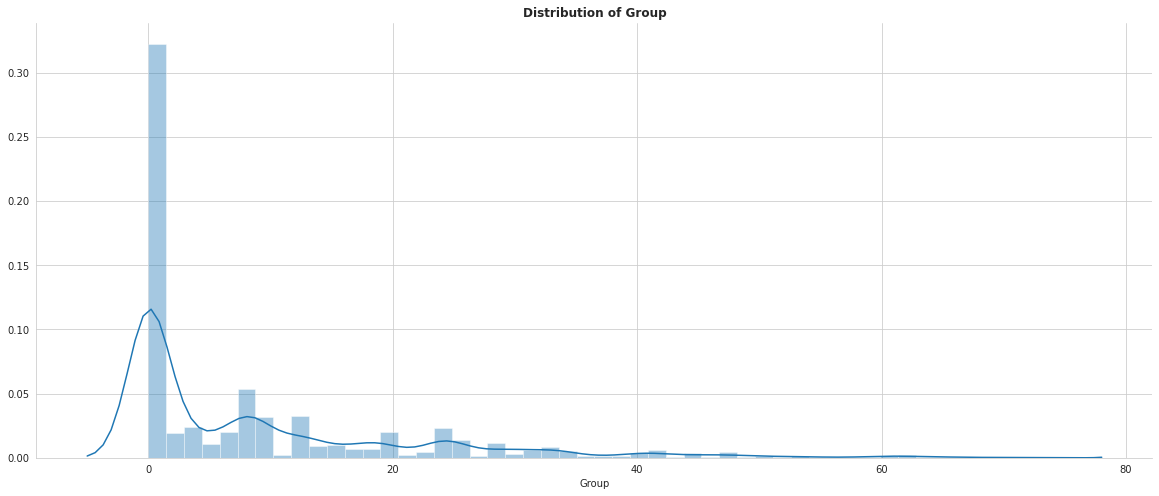

In [0]:
# plotting distribution plot for 'Group'

sns.distplot(mydata['Group'])
sns.despine()
plt.title('Distribution of Group', fontweight='bold')
plt.gcf().set_size_inches(20, 8)

Observation:

1.  As already noted data is skewed and imbalanced.

####3.1.2 Analysis of Feature ' Caller'

In [0]:
# checking the number of unique values in 'Caller'

print('Number of unique values in Callers:',rawdata.Caller.nunique())

Number of unique values in Callers: 2950


In [0]:
# checking the count of tickets raised per caller. since there are 2950 unique callers printing all values is not possible

rawdata['Caller'].value_counts(ascending = False).head(20)

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
jloygrwh acvztedi     64
spxqmiry zpwgoqju     63
oldrctiu bxurpsyi     57
olckhmvx pcqobjnd     54
dkmcfreg anwmfvlg     51
jyoqwxhz clhxsoqy     51
efbwiadp dicafxhv     45
afkstcev utbnkyop     32
gzhapcld fdigznbk     30
mnlazfsr mtqrkhnx     28
uvrbhlnt bjrmalzi     27
entuakhp xrnhtdmk     25
jionmpsf wnkpzcmv     24
vzqomdgt jwoqbuml     24
bozdftwx smylqejw     23
Name: Caller, dtype: int64

In [0]:
# creating a crosstab to identify the groups / count of tickets by callers who have raised atleast 10 tickets

caller_group = rawdata[rawdata['Caller'].map(rawdata['Caller'].value_counts()) >= 10]
ct_caller_group = pd.crosstab(caller_group['Caller'],caller_group['Assignment group'],margins=True,margins_name='Total')
print (ct_caller_group.shape)

(72, 57)


In [0]:
# crosstab view of Top callers ( who have raised atleast 10 tickets) and Group 

ct_caller_group.sort_values('Total',ascending=False)

Assignment group,GRP_0,GRP_1,GRP_10,GRP_11,GRP_12,GRP_13,GRP_14,GRP_15,GRP_16,GRP_18,GRP_19,GRP_2,GRP_20,GRP_21,GRP_22,GRP_23,GRP_24,GRP_25,GRP_26,GRP_27,GRP_29,GRP_3,GRP_30,GRP_31,GRP_33,GRP_34,GRP_36,GRP_37,GRP_39,GRP_4,GRP_40,GRP_41,GRP_43,GRP_44,GRP_45,GRP_46,GRP_47,GRP_48,GRP_5,GRP_50,GRP_51,GRP_53,GRP_54,GRP_56,GRP_57,GRP_6,GRP_60,GRP_62,GRP_63,GRP_65,GRP_69,GRP_7,GRP_71,GRP_72,GRP_8,GRP_9,Total
Caller,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Total,616,25,72,8,118,16,48,10,17,16,26,58,9,18,2,2,90,2,6,2,21,9,3,3,4,8,3,5,16,45,8,22,1,5,8,1,24,1,117,3,1,2,1,2,1,137,20,4,1,5,2,11,2,1,655,193,2506
bpctwhsn kzqsbmtp,0,6,60,0,8,4,1,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0,2,0,96,0,0,0,0,0,1,89,16,0,0,0,0,0,0,0,362,153,810
ZkBogxib QsEJzdZO,0,1,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,16,0,0,0,0,0,0,35,0,0,0,0,0,0,0,0,54,31,151
fumkcsji sarmtlhy,132,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,134
rbozivdq gmlhrtvp,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jaeuqbvt orlhenfj,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
xszoedmc gmhkdsnw,3,0,0,0,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
crjhotyk pxslorbe,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


Observation:

1.   Top callers ( callers with atleast 10 tickets i.e 72  of 2950 callers)   have contributed to 2506 tickets (30%) of tickets.
2.   These top callers have raised tickets across 56 groups.
3.   Out of this most of the tickets belong to Group 8, followed by Group 0, Group 9 and Group 12.

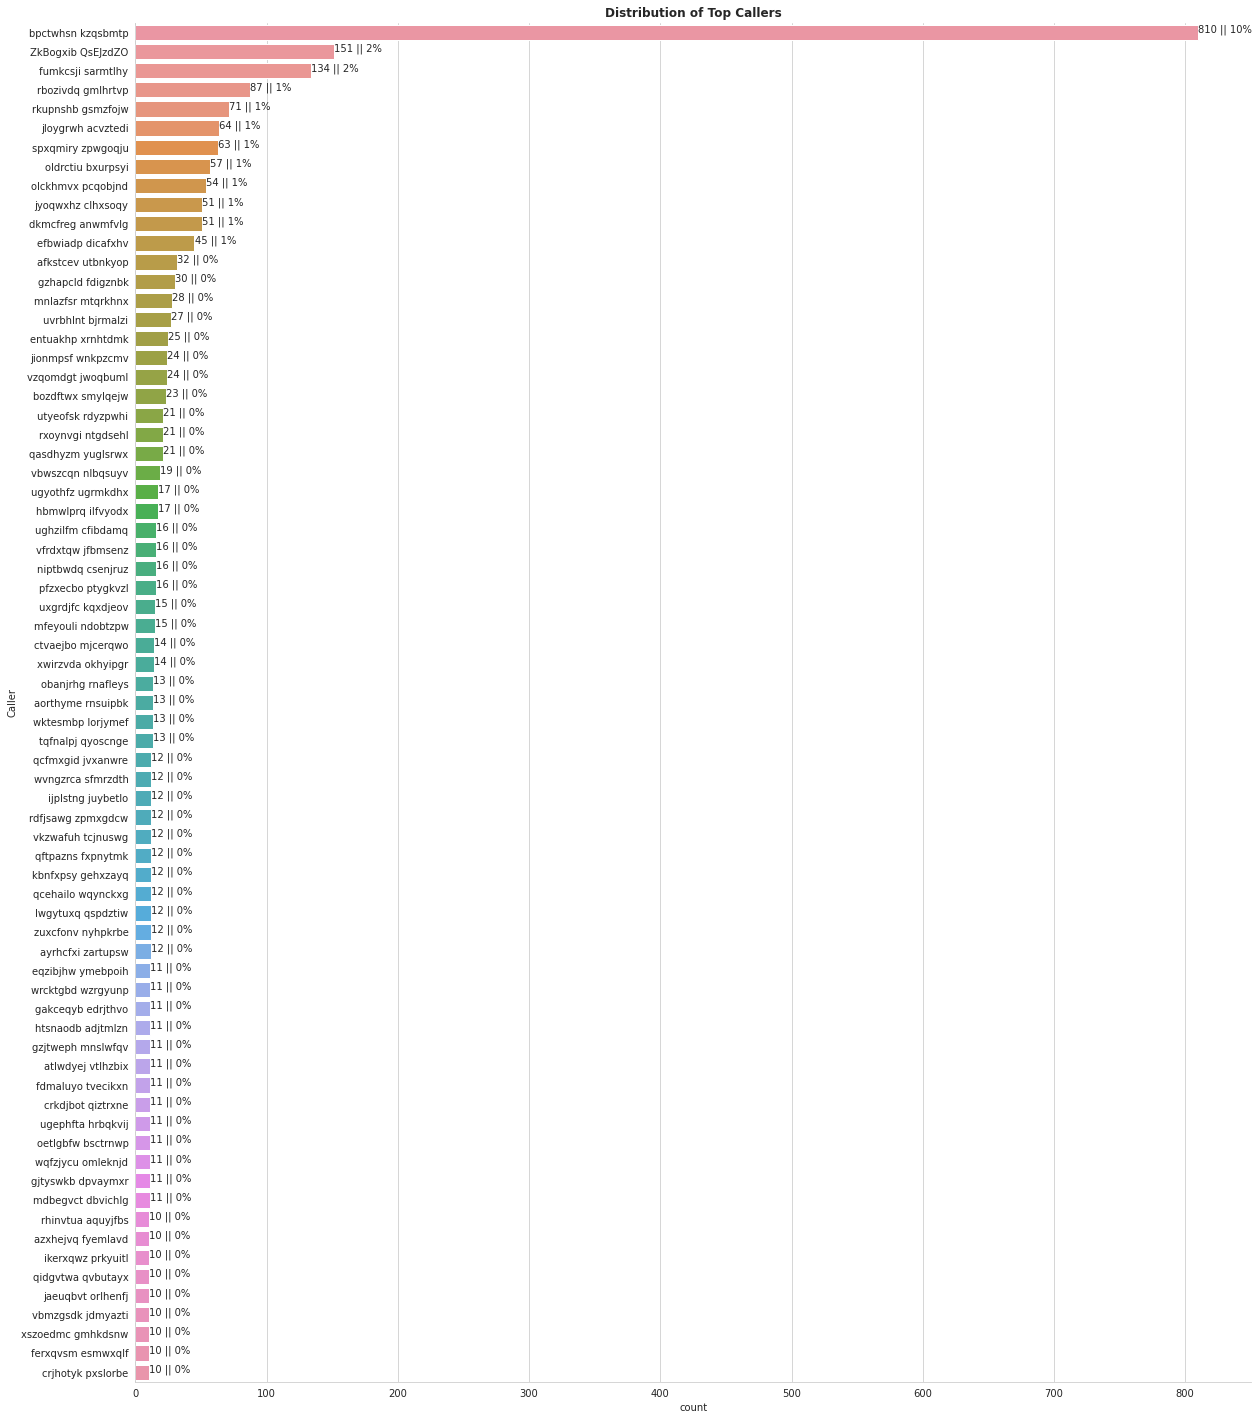

In [0]:
# creating countplot for the column:'Caller' to view the distibution of top callers ( those with min 10 tickets)

curattr = 'Caller'
plt.figure(figsize=(20,25))
plt.title('Distribution of Top Callers', fontweight='bold')
g=sns.countplot(data=caller_group,y=curattr,order=caller_group[curattr].value_counts().index)
sns.despine()
total=len(rawdata[curattr])

# annotating the plot to show absolute value and % of total for each 'Caller'

for p in g.patches:
    width, height =p.get_width(),p.get_height()    
    cnt ='{:}'.format(width)
    mix ='{0:.0%}'.format(width/total)
    disp = cnt+' || '+mix
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    g.annotate(disp,(x,y))

plt.show()

Observation:

1.   Caller bpctwhsn kzqsbmtp has raised the most number of tickets (810).



In [0]:
# defining function to get list of user names ( firstname and lastname as separate values)

username_list=[]
def getname(s):
  n0 = s.split()[0]
  n1 = s.split()[1]  
  username_list.append(n0) 
  username_list.append(n1)   
  return (" ".join(username_list))

In [0]:
# processing the records in the dataframe and get the full list of user names 

caller_list = list(mydata['Caller'].unique())
for i in caller_list:
  getname(i)

In [0]:
# printing few records from the list 

username_list[:10]

['spxjnwir',
 'pjlcoqds',
 'hmjdrvpb',
 'komuaywn',
 'eylqgodm',
 'ybqkwiam',
 'xbkucsvz',
 'gcpydteq',
 'owlgqjme',
 'qhcozdfx']

In [0]:
# converting 'caller' to numbers using labelencoder

le=LabelEncoder()
mydata['Caller'] = le.fit_transform(mydata['Caller'])
mydata['Caller'] = mydata['Caller'].astype('category')
mydata.head(5)

,Short description,Description,Caller,Group
0,login issue,-verified user details.(employee# & manager na...,2086,0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,818,0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,556,0
3,unable to access hr_tool page,unable to access hr_tool page,2637,0
4,skype error,skype error,1634,0


In [0]:
# Testing the significance of influence of the feature 'Caller' on Target 'Group' using Chi square test 

attr=['Caller']
Item=[]
for val in attr:
    cont=pd.crosstab(mydata[val],mydata['Group'])
    chi2,p,df,expected=stats.chi2_contingency(cont)
    Item.append([
        val,
        '%1.2f' %(p),
    ]);
    
chidf=pd.DataFrame(data=Item,columns=['Attribute','P Value'])
chidf.head(20)

,Attribute,P Value
0,Caller,0.00



Observation:

1.   Since p value is less than 0.05, null hypothesis H0 is rejected.
2.   Hence feature 'Caller' has significant statistical influence on Target 'Group'.
1.   However the above is only statistical inference based on the given dataset.
2.   In the business context, 'who' raises the support IT ticket has very little bearing on the classification than ' what' is raised in the ticket. The content of the ticket determines the who the ticket should be assigned to.
1.   Hence from the business context, we can safely assume that the feature 'Caller' has no significant relevance on assignment of the ticket.
2.   'Caller' column can be dropped from the dataframe.










In [0]:
# dropping column that is not relevant for further analysis
mydata.drop('Caller',axis=1,inplace=True)

# printing few records after dropping the column
mydata.head(5)

,Short description,Description,Group
0,login issue,-verified user details.(employee# & manager na...,0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,0
3,unable to access hr_tool page,unable to access hr_tool page,0
4,skype error,skype error,0


####3.1.3 Analysis of Features ' Short Description' and 'Description'

In [0]:
# printing few records to  analyze the text contained in 'short description' and 'description'
# these records were selected based on offline review of the input file and included here to note observations

reviewlist= [0,1,6,2579,6102,6489,416,6624,3251]
for i in reviewlist:
  print("Record at Index #",i,end='\n\n')
  print('Group Assigned:',rawdata['Assignment group'][i])
  print('Caller:',rawdata.Caller[i])
  print('Short Desc.:',rawdata['Short description'][i])
  print('Long Desc.:',rawdata.Description[i])
  print('\n')
  print("------------------------------------------")

Record at Index # 0

Group Assigned: GRP_0
Caller: spxjnwir pjlcoqds
Short Desc.: login issue
Long Desc.: -verified user details.(employee# & manager name)
-checked the user name in ad and reset the password.
-advised the user to login and check.
-caller confirmed that he was able to login.
-issue resolved.


------------------------------------------
Record at Index # 1

Group Assigned: GRP_0
Caller: hmjdrvpb komuaywn
Short Desc.: outlook
Long Desc.: 

received from: hmjdrvpb.komuaywn@gmail.com

hello team,

my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?

kind 


------------------------------------------
Record at Index # 6

Group Assigned: GRP_1
Caller: jyoqwxhz clhxsoqy
Short Desc.: event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/ 
Long Desc.: event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/sr3psa1d

Observation:

1.   Caller names do not appear to be in english. The value seems to have be masked for confidentiality purposes.
2.   Short description seems to have crisp note on the crux of the issue while Description column seems to contain detailed note on the issue/interaction etc.(e.g Index 0).
3.    Long description also contains mail ids and mail contents related to the issue reported (e.g Index 1).
1.   There are also cases where descriptions contain event alters with detailed note or path in both short description and description columns (e.g Index 6). These contain mix of numbers,special characters as well.
2.   There are also cases where descriptions contain job schedule alters with detailed note or path in both short description and description columns (e.g Index 2579). These contain mix of numbers,timestamps as well.However these do not provide any additional context other than the job id and timestamp.
1.   There are also foreign characters that cannot be identified (e.g Index 6102).
2.   Some of the descriptions are in languages other than english (e.g Index 6489). Further user names are also referred in the description.
1.   There are also cases where short description has detailed note and description column has only summary (e.g Index 416).
1.   In cases where there is mail content in the description, the text also contains the disclaimer statements that come appended with the mail text, in non english languages as well (e.g. Index 6624,3251)

In [0]:
# checking number of null records
 
mydata.isnull().sum()

Short description    8
Description          1
Group                0
dtype: int64

In [0]:
# reviewing the records having null value in few columns

(mydata[mydata.isnull().any(axis=1)]).head(20)

,Short description,Description,Group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,34
3383,NaN,\r\n-connected to the user system using teamvi...,0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,0
4395,i am locked out of skype,NaN,0


Observation:

1.   'Short description' column has 8 records with null value but these records have values in  'Description' column.
2.   'Description' column has only 1 record with null value but has value in 'Short description'.
1.   Following options are possible to handle null values:
      a.Drop records with null values. Since its only 9 out of 8506, it should not impact the model much.
      b.Since either of 'Short description' or ' Description' is missing, copy the description text from one column to the other column where it is missing.
      c.Concatenate 'Short description' and 'Description' in to a new description column and drop both 'Short description' and 'Description' columns.
2.   Option a will not have significant model impact but it will not address other issues with short description/description where short summary and detailed note is swapped in few records and it will add additional model complexity to handle 2 text description columns to model the classification.
2.   Option b will retain all the records but it will not address other issues with short description/description where short summary and detailed note is swapped in few records and it will add additional model complexity to handle 2 text description columns to model the classification.
2.   Option c will be optimal one as it will handle issues with short description/description where short summary and detailed note is swapped in few records and since this will be one consolidated description column, rest of the descriptions can be dropped making it the only text description column to be processed and modeled .

In [0]:
# creating function to concatenate short description and description if texts in these 2 columns are not the same

def create_new_description(i):
  str_sd = mydata['Short description'].map(str).iloc[i]
  str_ld = mydata['Description'].map(str).iloc[i]
  str_nd = str_sd +'-'+ str_ld
  if str_sd == str_ld:
    return str_ld
  else:
    return str_nd

In [0]:
# creating new feature 'New Description' and populating the concatenated description values

mydata['New_Description']=''
for i in mydata.index:
    mydata['New_Description'][i] = create_new_description(i)

In [0]:
# reviewing few records to check the result

mydata.head(5)

,Short description,Description,Group,New_Description
0,login issue,-verified user details.(employee# & manager na...,0,login issue--verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,0,outlook-\r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,0,cant log in to vpn-\r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,0,unable to access hr_tool page
4,skype error,skype error,0,skype error


In [0]:
# revieweing the EDA after the update 

mydata.select_dtypes(include=['object']).describe(include='all')

,Short description,Description,New_Description
count,8498,8505,8506
unique,7481,7817,7893
top,password reset,the,windows password reset
freq,38,56,29


In [0]:
# dropping column that is not relevant for further analysis
mydata.drop('Short description',axis=1,inplace=True)
mydata.drop('Description',axis=1,inplace=True)

In [0]:
# renaming the new column as 'Description'

mydata.rename(columns={'New_Description': 'Description'}, inplace=True)

In [0]:
# calculating the number of words in the description and storing in separate column in the dataframe for analyzing the description length

mydata['Length'] = mydata['Description'].apply(lambda i:len(i.split()) )

# printing few rows to check the result
mydata.head(5)

,Group,Description,Length
0,0,login issue--verified user details.(employee# ...,34
1,0,outlook-\r\n\r\nreceived from: hmjdrvpb.komuay...,26
2,0,cant log in to vpn-\r\n\r\nreceived from: eylq...,16
3,0,unable to access hr_tool page,5
4,0,skype error,2


In [0]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8506 entries, 0 to 8505
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Group        8506 non-null   category
 1   Description  8506 non-null   object  
 2   Length       8506 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 144.4+ KB


In [0]:
# creating function for counting outliers ( based on IQR )

def outliercount(attr,df):
    Q1 = df[attr].quantile(0.25)
    Q3 = df[attr].quantile(0.75)
    IQR = Q3-Q1
    outlier_count=((df[attr]<(Q1-(1.5*IQR))) | (df[attr]>(Q3+(1.5*IQR)))).sum()
    return outlier_count

In [0]:
# creating custom EDA function for analyzing attributes of type integer

def EDA_custom_numbers():
  Item=[]
  for attr in mydata.select_dtypes(include=['integer','float64']).columns:
      Item.append([
          attr,mydata[attr].dtype,
          mydata[attr].isna().sum(),
          round((mydata[attr].isna().sum()/len(mydata[attr]))*100,2),
          mydata[attr].nunique(),
          list(mydata[attr].sample(5).drop_duplicates().values),
          mydata[attr].count(),
          len(mydata[mydata[attr]<0]),
          mydata[attr].std(),
          mydata[attr].min(),
          mydata[attr].quantile(.25),
          mydata[attr].quantile(.50),
          mydata[attr].mean(),
          mydata[attr].quantile(0.75),
          mydata[attr].max(),
          mydata[attr].skew(),
          outliercount(attr,mydata),
          round((outliercount(attr,mydata)/mydata[attr].count())*100,2)
      ]);
    
  return Item


# the results will be populated to dataframe columns and hence setting up the labels 

eda_col = ['Attribute','Datatype','Null','Null%',\
          'Unique','Sample','Count','-Ve Data',\
          'Stddev','Min','25%','50%','Mean','75%',\
          'Max','Skew','No.# Outlier','% Outlier']

In [0]:
# reviewing the EDA results for 'Length' using the custom function for EDA

eda_df = pd.DataFrame.from_records(EDA_custom_numbers(),columns=eda_col)
eda_df.round(2)

,Attribute,Datatype,Null,Null%,Unique,Sample,Count,-Ve Data,Stddev,Min,25%,50%,Mean,75%,Max,Skew,No.# Outlier,% Outlier
0,Length,int64,0,0.0,254,"[35, 88, 45, 4, 24]",8506,0,66.49,1,7.0,19.0,31.82,35.0,1638,12.77,637,7.49


Observation:

1.   Lengh of the description column varies from 1 to 1638.
2.   Data is hevily skewed and has several outliers.

Skewness of Length distribution = 12.77


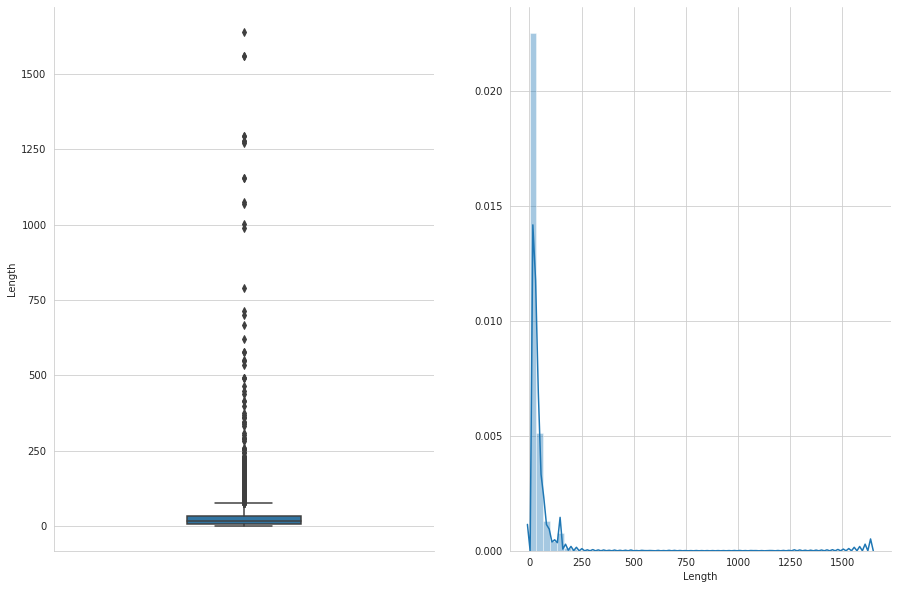

In [0]:
# Checking of the distribution of 'Length' at over all level

curattr = 'Length'
f,axes = plt.subplots(1,2)
sns.boxplot(x = mydata[curattr],orient = 'v',data = mydata,width=.3, ax = axes[0])
sns.distplot( mydata[curattr],ax = axes[1])
sns.despine()
plt.gcf().set_size_inches(15, 10)
curattr_skew = mydata[curattr].skew()
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )

Observation:

1.   Data is hevily skewed and has several outliers.

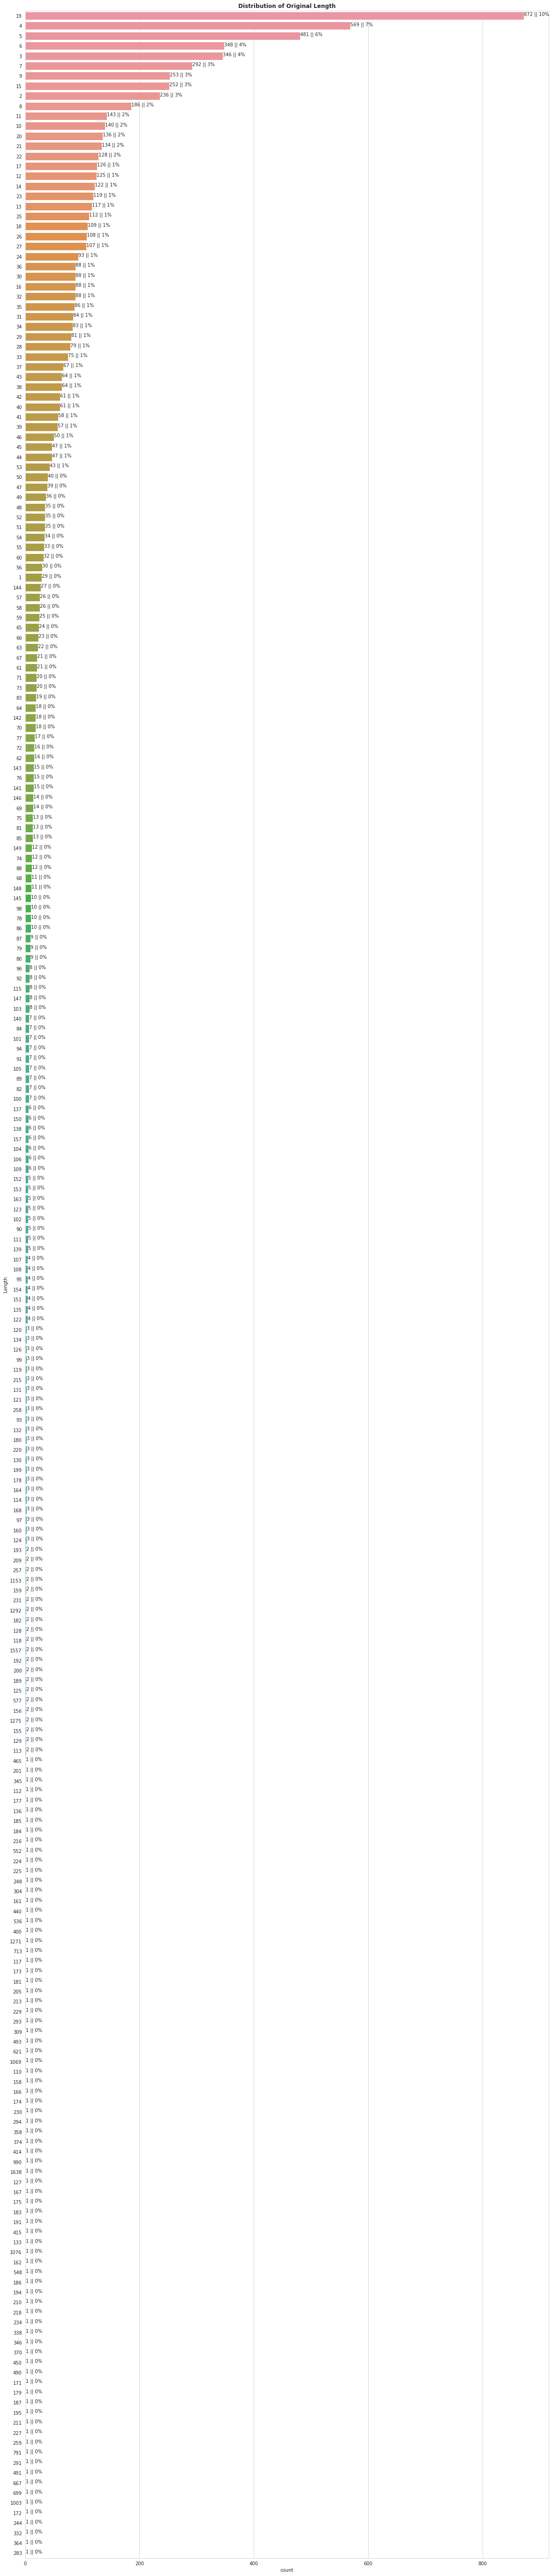

In [0]:
# Checking of the distribution of 'Length' at Group level

curattr = 'Length'
plt.figure(figsize=(20,100))
plt.title('Distribution of Original Length', fontweight='bold')
total=len(mydata[curattr])
g=sns.countplot(data=mydata,y=curattr,order=mydata[curattr].value_counts().index)

# annotating the absolute and percentage to total values

for p in g.patches:
    width, height =p.get_width(),p.get_height()    
    cnt ='{:}'.format(width)
    mix ='{0:.0%}'.format(width/total)
    disp = cnt+' || '+mix
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    g.annotate(disp,(x,y))

plt.show()

Observation:

1.   Most of the records seem to fall under length 30.
2.   10% of the records are of length 19.
2.   Lot of outliers account for < 1% .

In [0]:
# printing the maximum length of description

print('Maximum length of description:',mydata.Length.max())

Maximum length of description: 1638


In [0]:
# since the number of classes ( 'Group') are more and heavily skewed, \
# we will narrow down further analysis of description length to consider only those 'Groups' that have more than 50 records available ( referred to as top groups)

mydata_topgroups = mydata[mydata['Group'].map(mydata['Group'].value_counts()) >= 50].copy(deep=True)

In [0]:
# getting the list and count of number of top groups ( Groups where number of tickets is more than or equal to 50)

topgroup_list = mydata_topgroups.Group.unique()
print(topgroup_list)

[0, 3, 4, 5, 6, ..., 26, 29, 31, 33, 34]
Length: 24
Categories (24, object): [0, 3, 4, 5, ..., 29, 31, 33, 34]


In [0]:
# creating detailed EDA to analyze 'Length' at 'Group' level ( all groups)

curattr = 'Group'
Item=[]
for attr in mydata[curattr].unique():
    Item.append([
        attr,
        len(mydata[mydata[curattr] == attr]),
        round((len(mydata[mydata[curattr] == attr])/len(mydata[curattr]))*100,2),
        mydata[mydata[curattr] == attr].Length.min(),
        mydata[mydata[curattr] == attr].Length.quantile(.25),
        mydata[mydata[curattr] == attr].Length.quantile(.50),
        mydata[mydata[curattr] == attr].Length.quantile(.75),        
        mydata[mydata[curattr] == attr].Length.max(),
        mydata[mydata[curattr] == attr].Length.mean(),
        outliercount('Length',mydata[mydata[curattr] == attr])
        ]);
    
group_len=pd.DataFrame(data=Item,columns=['Group','No.of observations','Mix%',\
                                          'Length_Min','Length_Q1','Length_Q2','Length_Q3','Length_Max','Length_Avg','Outlier'])

In [0]:
# creating custom EDA function for analyzing attribute at class level

def EDA_custom_classlevel(cls,atr,tag):
  Item=[]
  for attr in mydata[cls].unique():
    Item.append([
			attr,
			len(mydata[mydata[cls] == attr]),
			round((len(mydata[mydata[cls] == attr])/len(mydata[cls]))*100,2),
			tag,
			mydata[mydata[cls] == attr][atr].min(),
			mydata[mydata[cls] == attr][atr].quantile(.25),
			mydata[mydata[cls] == attr][atr].quantile(.50),
			mydata[mydata[cls] == attr][atr].quantile(.75),        
			mydata[mydata[cls] == attr][atr].max(),
			mydata[mydata[cls] == attr][atr].mean(),
			outliercount(atr,mydata[mydata[cls] == attr])
			]);
  return Item

# the results will be populated to dataframe columns and hence setting up the labels 

eda_class_col = ['Group','No.of Obs.','Mix','Length','Min','Q1','Q2','Q3','Max','Avg','Outlier']

In [0]:
# reviewing the EDA results for 'Length' using the custom function for EDA

group_len_org_df = pd.DataFrame.from_records(EDA_custom_classlevel('Group','Length','Original'),columns=eda_class_col)

# converting the data types for diplaying values as integers

group_len_org_df['Q1'] = group_len_org_df.Q1.astype('int64')
group_len_org_df['Q2'] = group_len_org_df.Q2.astype('int64')
group_len_org_df['Q3'] = group_len_org_df.Q3.astype('int64')
group_len_org_df['Avg'] = group_len_org_df.Avg.astype('int64')

# displaying distribution of 'Length' at 'Group' level.
# since this is only tabular representation all the groups are considered

pd.set_option("display.max_rows", None, "display.max_columns", None)
group_len_org_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
Group,0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,32,62,63,64,65,66,67,68,69,70,71,72,73
No.of Obs.,3976,31,200,100,129,184,68,661,252,140,30,257,145,118,39,85,81,88,215,241,36,29,31,25,289,116,56,18,44,97,39,69,107,62,2,15,16,3,19,45,40,37,5,15,35,6,27,25,6,14,8,9,11,2,8,3,2,3,6,20,2,4,25,3,2,11,4,2,3,2,2,2,2,2
Mix,46.74,0.36,2.35,1.18,1.52,2.16,0.8,7.77,2.96,1.65,0.35,3.02,1.7,1.39,0.46,1,0.95,1.03,2.53,2.83,0.42,0.34,0.36,0.29,3.4,1.36,0.66,0.21,0.52,1.14,0.46,0.81,1.26,0.73,0.02,0.18,0.19,0.04,0.22,0.53,0.47,0.43,0.06,0.18,0.41,0.07,0.32,0.29,0.07,0.16,0.09,0.11,0.13,0.02,0.09,0.04,0.02,0.04,0.07,0.24,0.02,0.05,0.29,0.04,0.02,0.13,0.05,0.02,0.04,0.02,0.02,0.02,0.02,0.02
Length,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original
Min,1,8,3,3,7,7,4,4,4,4,10,2,2,3,3,6,9,9,2,4,12,7,5,5,4,3,6,4,4,6,1,1,2,2,36,2,10,21,15,7,10,4,19,8,7,12,5,1,20,5,12,20,8,52,4,14,19,24,8,13,12,13,2,8,80,26,2,63,34,192,36,26,2,58
Q1,4,19,9,18,19,19,18,19,19,19,23,16,26,15,23,26,9,26,10,20,21,22,20,19,5,16,19,10,13,26,1,3,10,9,36,5,17,21,25,29,22,13,33,18,19,18,14,1,23,15,33,26,17,53,20,51,24,24,35,19,12,19,13,25,80,27,12,63,34,196,36,36,3,58
Q2,9,23,16,27,19,19,26,19,19,19,34,26,46,30,41,37,9,43,18,34,49,39,31,37,6,30,48,19,17,35,2,5,20,21,36,5,28,22,29,37,37,18,44,53,32,27,15,2,26,22,40,30,21,54,35,89,30,25,67,19,12,24,21,42,80,32,17,63,35,201,36,47,4,58
Q3,28,38,37,45,19,23,38,31,19,40,59,42,66,52,69,51,10,65,37,71,77,58,47,73,8,44,73,40,28,56,4,11,31,29,36,21,44,48,83,48,53,27,52,80,50,33,25,3,46,32,46,36,52,55,37,401,35,27,98,20,12,34,30,42,80,54,22,63,39,205,36,58,5,58
Max,493,105,1076,227,200,257,98,291,258,164,248,1153,257,358,161,200,65,364,699,1638,180,125,95,126,130,231,490,83,179,209,338,536,211,152,36,107,83,74,1557,180,224,142,71,167,229,49,147,400,64,191,65,114,98,57,47,713,41,30,164,82,12,59,1292,42,80,88,35,63,44,210,36,69,6,58
Avg,20,35,37,43,28,27,30,46,27,33,52,44,52,41,50,43,11,59,31,109,58,45,34,49,9,37,60,27,29,44,19,18,29,25,36,21,32,39,129,45,49,22,43,63,43,27,26,17,35,43,39,40,35,54,29,272,30,26,73,24,12,30,123,30,80,42,17,63,37,201,36,47,4,58


## 3.2 Text preprocessing and Analyzing the processed text

Note:

1.   The below sections on text preprocessing may be iterative and will need to be  tweaked depending on how the model performs (e.g. with stopword/without stopword, with stemming/without stemming , with refined stopwords etc.)

In [0]:
# setting up contraction mapping dictionary

contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have",\
                           "cant": "cannot"}

In [0]:
# setting up words list from cases like mail disclaimer , to be included in ignore words list

mailtext= 'diese mitteilung ist einzig und allein fÃ¼r die nutzung durch den adressaten bestimmt und kann informationen enthalten\
           die schutzwÃ¼rdig vertraulich oder nach geltendem recht von der offenlegung ausgenommen sind \
           die verbreitung verteilung oder vervielfÃ¤ltigung dieser mitteilung durch personen\
           bei denen es sich nicht um die beabsichtigten empfÃ¤nger handelt ist streng verboten\
           wenn diese mitteilung aufgrund eines versehens bei ihnen eingegangen ist\
           dann benachrichtigen sie bitte den absender und lÃ¶schen sie diese mitteilung\
           mit freundlichen grÃ¼ÃŸen\
           von\
           hallo\
           select the following link to view the disclaimer an alternate language\
           please do not print this email unless it is absolutely necessary\
           spread environmental awareness\
           confidentiality caution this communication including any accompanying documents is intended \
           only for the sole use of the person(s) to whom it is addressed and may contain information that is privileged\
           confidential and exempt from disclosure\
           any unauthorised reading dissemination distribution duplication of this communication by someone other than the intended recipient\
           is strictly prohibited. if your receipt of this communication is in \
           please notify the sender and destrtgoy destroy the original communication immediately'

mailtext_list = re.sub("[^\w]", " ",  mailtext).split()           

In [0]:
# checking the words list created

print(mailtext_list)

['diese', 'mitteilung', 'ist', 'einzig', 'und', 'allein', 'fÃ¼r', 'die', 'nutzung', 'durch', 'den', 'adressaten', 'bestimmt', 'und', 'kann', 'informationen', 'enthalten', 'die', 'schutzwÃ¼rdig', 'vertraulich', 'oder', 'nach', 'geltendem', 'recht', 'von', 'der', 'offenlegung', 'ausgenommen', 'sind', 'die', 'verbreitung', 'verteilung', 'oder', 'vervielfÃ', 'ltigung', 'dieser', 'mitteilung', 'durch', 'personen', 'bei', 'denen', 'es', 'sich', 'nicht', 'um', 'die', 'beabsichtigten', 'empfÃ', 'nger', 'handelt', 'ist', 'streng', 'verboten', 'wenn', 'diese', 'mitteilung', 'aufgrund', 'eines', 'versehens', 'bei', 'ihnen', 'eingegangen', 'ist', 'dann', 'benachrichtigen', 'sie', 'bitte', 'den', 'absender', 'und', 'lÃ', 'schen', 'sie', 'diese', 'mitteilung', 'mit', 'freundlichen', 'grÃ¼ÃŸen', 'von', 'hallo', 'select', 'the', 'following', 'link', 'to', 'view', 'the', 'disclaimer', 'an', 'alternate', 'language', 'please', 'do', 'not', 'print', 'this', 'email', 'unless', 'it', 'is', 'absolutely', 'ne

In [0]:
# setting up custom stopwords and user names list as list of words to remove

stop_words_custom = ['to','the','is','from','and','received','please','at',\
                     'of','it','this','user','my','you','am','are',\
                     'be','we','help','was','or','hello','me','hi','I','that',\
                     'etc','your','pm','et','kind','best','someone','for','somebody','said'\
                     'na','yes','pl','pls','a','an','th','nd','st','will','his','him','her'\
                     'job','company','sid','in','on','when','gentles','yno']                     

ignore_words_list = stop_words_custom + username_list + mailtext_list

print('Number of words in the ignore list:',len(ignore_words_list))

Number of words in the ignore list: 6134


In [0]:
# since 'short description' and 'description' columns were concatenated, it is possible that words may have been repeated in both 'short description' and 'description'
# hence creating a function to remove such occurances.

def remove_duplicate_pairofwords(word):
  p = [] 
  for i in word.split():  
        if (word.count(i)>1 and (i not in p)or word.count(i)==1): 
            p.append(i)  
  return ' '.join(p)

In [0]:
# creating function to clean the descriptions text by performing several transformations like converting to lower text, removing html tags etc.

def text_cleaner(text,num):
    # convert to lower case
    newString = text.lower()
    # remove html tags  
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub('"','', newString)
    # mail id removel
    newString = ' '.join([item for item in newString.split() if '@' not in item])
    # contraction mapping 
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])  
    # remove apostrophe   
    newString = re.sub(r"'s\b","",newString)
    # remove anything other than alphabetic 
    newString = re.sub("[^a-zA-Z]", " ", newString)
    # remove repeated words
    newString = " ".join([k for k,v in groupby(newString.split())]) 
    # remove 'ignore words' in the list based on input parameter and split
    if(num==0):
        tokens = [w for w in newString.split() if not w in ignore_words_list]
    else:
        tokens=newString.split()  
    long_words=[]
    # remove short words    
    for i in tokens:
        if len(i)>1:                                                
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [0]:
# calling both the text cleaning functions and storing cleaned description in a separate column in the dataframe. 

mydata['cleaned_description']=mydata['Description'].map(lambda x: text_cleaner(x,0))
mydata['cleaned_description']=mydata['cleaned_description'].map(lambda x: remove_duplicate_pairofwords(x))

# calculating the length of cleaned description

mydata['cleaned_length'] = mydata['cleaned_description'].apply(lambda x:len(x.split()) )

In [0]:
# printing few records in the dataframe to compare the results of text cleaning and impact on description length

mydata.head(5)

,Group,Description,Length,cleaned_description,cleaned_length
0,0,login issue--verified user details.(employee# ...,34,login issue verified details employee manager ...,18
1,0,outlook-\r\n\r\nreceived from: hmjdrvpb.komuay...,26,outlook team meetings skype appearing calendar...,10
2,0,cant log in to vpn-\r\n\r\nreceived from: eylq...,16,cannot log vpn,3
3,0,unable to access hr_tool page,5,unable access hr tool page,5
4,0,skype error,2,skype error,2


In [0]:
# printing full text (post and pre cleaning) along with label for selected rows reviewed earlier

for i in reviewlist:
  print("Record at Index #",i)
  print('Group Assigned:',mydata['Group'][i])
  print('Description:',mydata['Description'][i])
  print('cleaned_description:',mydata['cleaned_description'][i])
  print("\n")

Record at Index # 0
Group Assigned: 0
Description: login issue--verified user details.(employee# & manager name)
-checked the user name in ad and reset the password.
-advised the user to login and check.
-caller confirmed that he was able to login.
-issue resolved.
cleaned_description: login issue verified details employee manager name checked ad reset password advised check caller confirmed he able resolved


Record at Index # 1
Group Assigned: 0
Description: outlook-

received from: hmjdrvpb.komuaywn@gmail.com

hello team,

my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?

kind 
cleaned_description: outlook team meetings skype appearing calendar can advise how correct


Record at Index # 6
Group Assigned: 1
Description: event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/ -event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID

Observation:

1.   While text preprocessing has cleaned most of the issues, it has still not resolved cases where the words are not english.

In [0]:
# reviewing the EDA results for 'cleaned_length' using the custom function for EDA

eda_df = pd.DataFrame.from_records(EDA_custom_numbers(),columns=eda_col)
eda_df.round(2)

,Attribute,Datatype,Null,Null%,Unique,Sample,Count,-Ve Data,Stddev,Min,25%,50%,Mean,75%,Max,Skew,No.# Outlier,% Outlier
0,Length,int64,0,0.0,254,"[26, 12, 21, 64]",8506,0,66.49,1,7.0,19.0,31.82,35.0,1638,12.77,637,7.49
1,cleaned_length,int64,0,0.0,135,"[5, 3, 8, 26]",8506,0,21.11,0,4.0,8.0,13.86,17.0,469,9.30,623,7.32


Observation:

1.   Text preprocessing has shrinked the text and hence cleaned_length has max length of only 469 (vs 1638 earlier).
1.   Unique length count is down from 135 ( vs 254).
1.   The median is also at 8 (vs 19) and average is 14 (vs 32).
1.   Skeness is reduced only marginally. However this may not influence the model much as the max word length for the model will be considered in such a way that more than 97% of dataset is covered.


In [0]:
# checking if there is any null data post cleaning

mydata.isnull().sum()

Group                  0
Description            0
Length                 0
cleaned_description    0
cleaned_length         0
dtype: int64

In [0]:
# though above shows 0 records, there are blanks in cleaned description and such records are filtered below for review

indexNames = mydata[mydata['cleaned_description'] == ''].index
print(indexNames)

Int64Index([1081, 1178, 1452, 1700, 1701, 1704, 1710, 1711, 1860, 1954, 1955,
            2004, 2848, 2932, 3120, 3137, 3315, 3738, 3903, 4028, 4098, 4501,
            4502, 4503, 5147, 5149, 5303, 5311, 5761, 5913, 6106, 6534, 6535,
            7309, 7314, 7317, 7588, 7969, 8471],
           dtype='int64')


In [0]:
# reviewing list of records where cleaned description is blank

(mydata[mydata['cleaned_description'] == '']).head(50)

,Group,Description,Length,cleaned_description,cleaned_length
1081,48,ç”¨å‹è½¯ä»¶é—®é¢˜-æ‰“å¼€å·²å…³é—­çš„é”€å”®è®¢...,1,,0
1178,30,ç”µè¯æœºæ²¡æœ‰å£°éŸ³,1,,0
1452,30,è€ƒå‹¤ç³»ç»Ÿè¿›ä¸åŽ»è¯·å¤„ç†è°¢è°¢ï¼,1,,0
1700,48,è´¦æˆ·è¢«é”å®š-ç”¨æˆ·å¿˜è®°å¯†ç ï¼Œå¯¼è‡´è´¦...,2,,0
1701,48,è¾“å…¥ç”¨æˆ·åå’Œå¯†ç åŽæ˜¾ç¤ºå‡ºé”™-ç™»å½•...,4,,0
1704,48,è´¦æˆ·è¢«é”å®š-ç”¨æˆ·è´¦æˆ·é”å®šï¼Œè¯·æ±‚è§£é”,1,,0
1710,48,äº§å“ä¸Žä»“åº“å¯¹ä¸ä¸Š-äº§å“æ‰€åœ¨ä»“åº“å‡º...,4,,0
1711,48,å¼€æœºé»‘å±-ç”µè„‘å¯åŠ¨åŽé»‘å±ï¼Œä¸»æœºæ— ...,2,,0
1860,0,s,1,,0
1954,30,ç¬”è®°æœ¬é‡æ–°è£…ä¸‹ç³»ç»Ÿ-æŠŠæˆ‘çš„ç¬”è®°æœ¬...,1,,0


Observation:

1.   Most of these are result of cleaning foreign characters.
1.   Since nothing meaningful can be derived from above the rows can be deleted.

In [0]:
# Delete these row indexes from dataFrame

mydata.drop(indexNames , inplace=True)

Skewness of cleaned_length distribution = 9.30


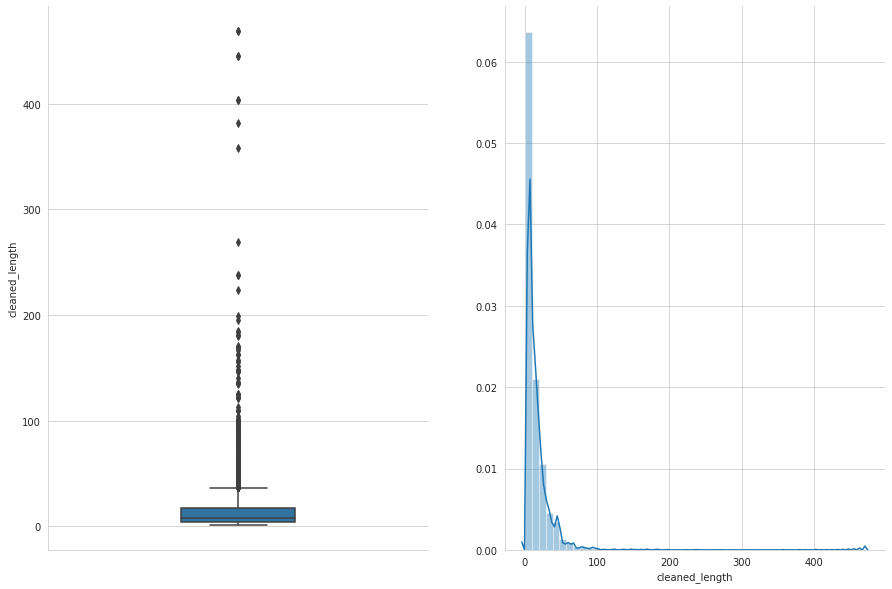

In [0]:
# Checking of the distribution of 'cleaned_length' at over all level

curattr = 'cleaned_length'
f,axes = plt.subplots(1,2)
sns.boxplot(x = mydata[curattr],orient = 'v',data = mydata,width=.3, ax = axes[0])
sns.distplot( mydata[curattr],ax = axes[1])
sns.despine()
plt.gcf().set_size_inches(15, 10)
curattr_skew = mydata[curattr].skew()
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )

Observation:

1.   Data still has skewness and outliers.
1.   However, Skeweness and outliers have improved over previous distribution.

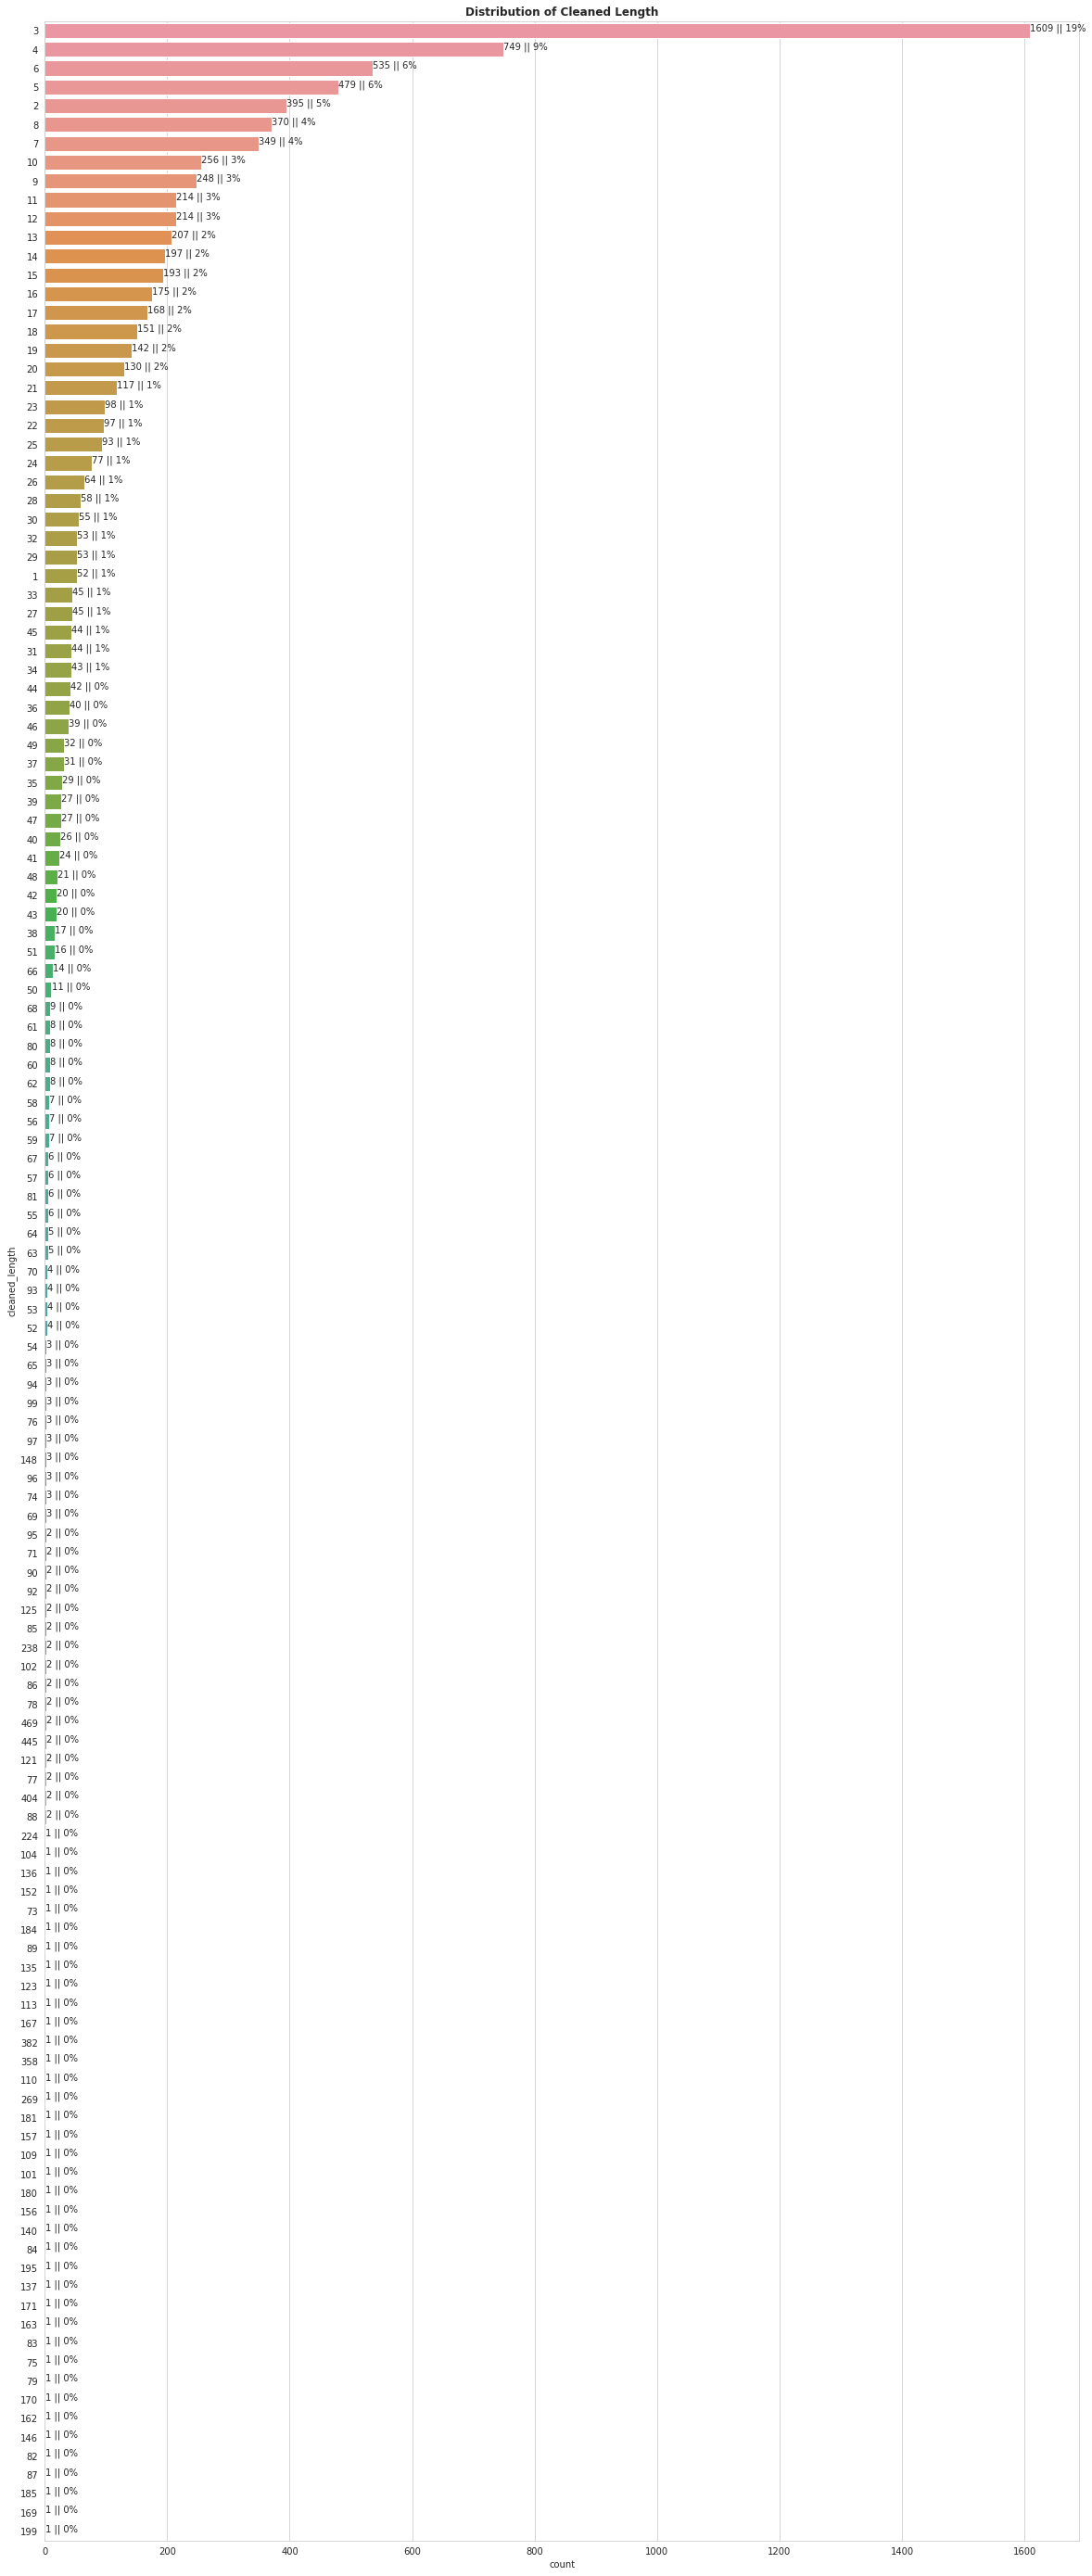

In [0]:
# Checking of the distribution of 'cleaned_length' at Group level

curattr = 'cleaned_length'
plt.figure(figsize=(20,50))
plt.title('Distribution of Cleaned Length', fontweight='bold')
total=len(mydata[curattr])
g=sns.countplot(data=mydata,y=curattr,order=mydata[curattr].value_counts().index)

# annotating the absolute and percentage to total values

for p in g.patches:
    width, height =p.get_width(),p.get_height()    
    cnt ='{:}'.format(width)
    mix ='{0:.0%}'.format(width/total)
    disp = cnt+' || '+mix
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    g.annotate(disp,(x,y))

plt.show()

Observation:

1.   Most of the records seem to fall under length 25.
2.   17% of the records are of length 3.
2.   Lot of outliers account for < 1% .

In [0]:
# printing the maximum length of cleaned description

print('Maximum length of cleaned description:',mydata.cleaned_length.max())

Maximum length of cleaned description: 469


In [0]:
# since the number of classes ( 'Group') are more and heavily skewed, \
# we will narrow down further analysis of description length to consider only those 'Groups' that have more than 50 records available ( referred to as top groups)

mydata_topgroups = mydata[mydata['Group'].map(mydata['Group'].value_counts()) >= 50].copy(deep=True)
mydata_topgroups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7730 entries, 0 to 8497
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Group                7730 non-null   category
 1   Description          7730 non-null   object  
 2   Length               7730 non-null   int64   
 3   cleaned_description  7730 non-null   object  
 4   cleaned_length       7730 non-null   int64   
dtypes: category(1), int64(2), object(2)
memory usage: 312.6+ KB


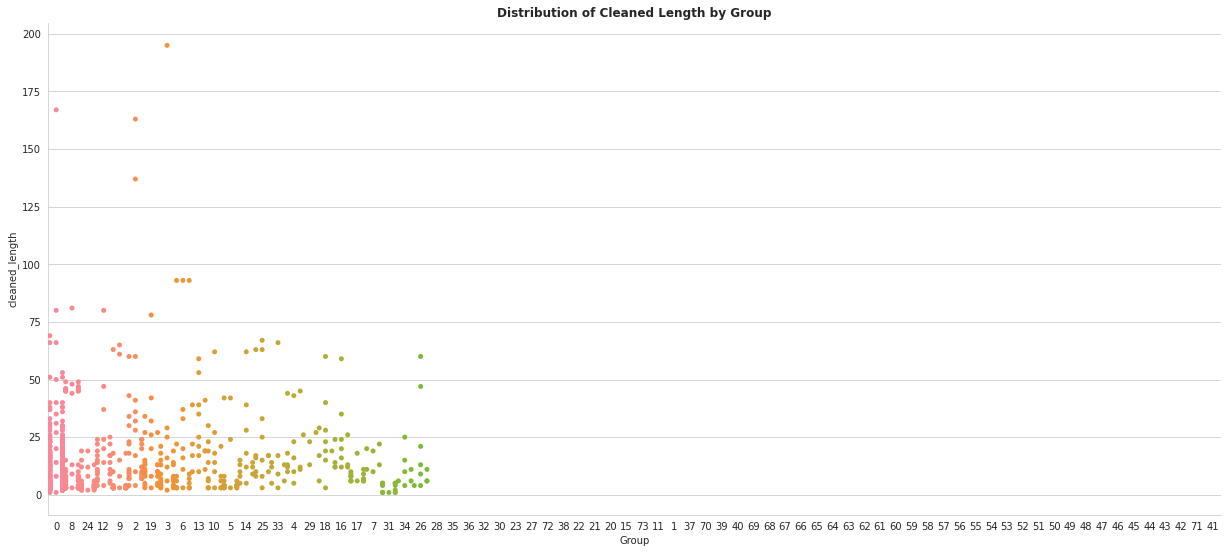

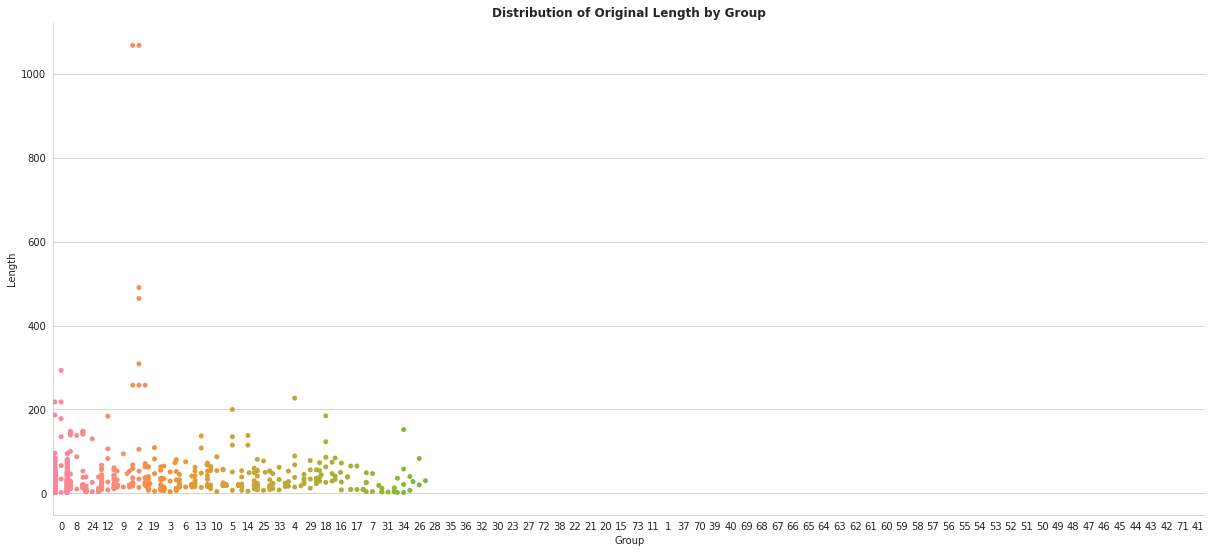

In [0]:
# depicting swarmplot to show the distribution of Length at Group level (top groups only)

g=sns.catplot(x='Group',y='cleaned_length',kind='swarm',data=mydata_topgroups.sample(1000,replace=True,random_state = 9)\
              ,order=mydata_topgroups['Group'].value_counts().index )
sns.despine()
plt.title('Distribution of Cleaned Length by Group', fontweight='bold')
plt.gcf().set_size_inches(20, 8)

# depicting swarmplot to show the distribution of Length at Group level (top groups only)

sns.catplot(x='Group',y='Length',kind='swarm',data=mydata_topgroups.sample(1000,replace=True,random_state = 1)\
            ,order=mydata_topgroups['Group'].value_counts().index )
sns.despine()
plt.title('Distribution of Original Length by Group', fontweight='bold')
plt.gcf().set_size_inches(20, 8)

Observation:

1.   A comparative analysis of above distribution shows how the text cleaning has impacted the length concentration of cleaned description length when compared to original description length.

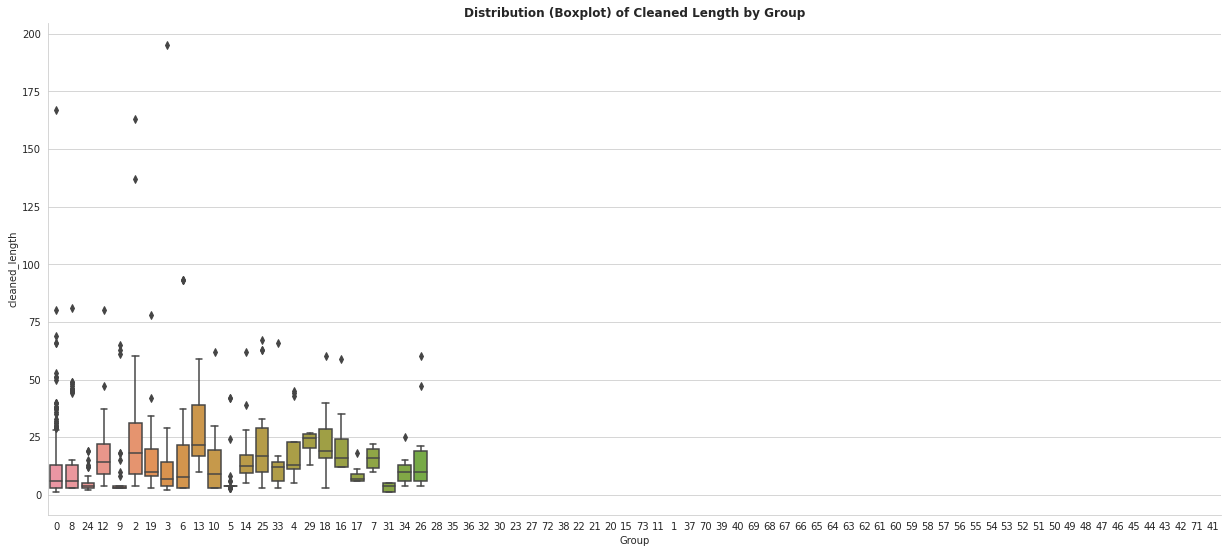

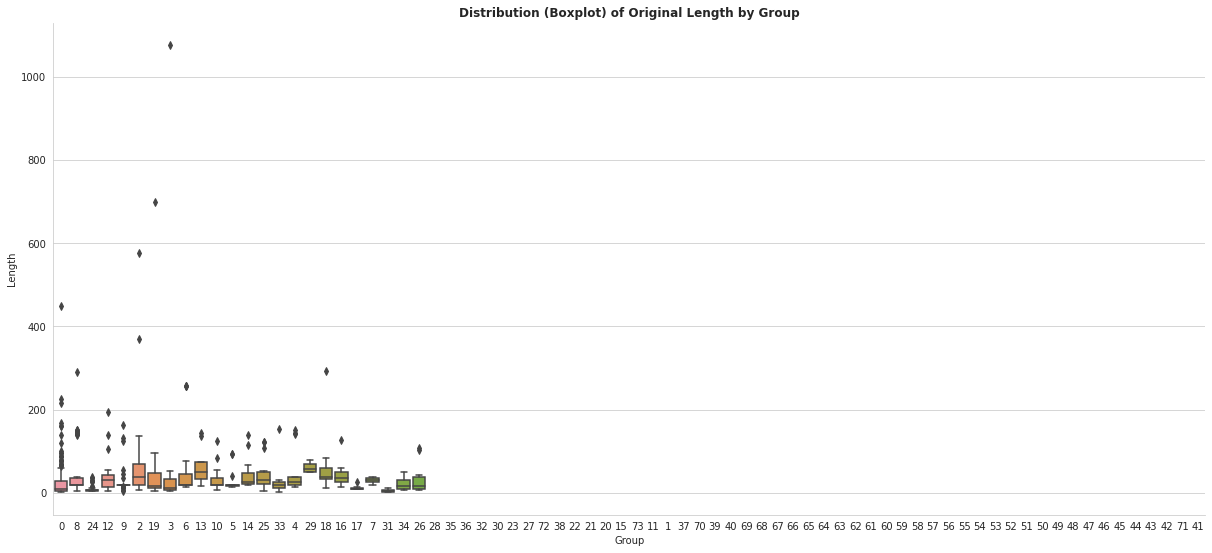

In [0]:
# depicting boxplot to show the distribution of Length at Group level (top groups only)

g=sns.catplot(x='Group',y='cleaned_length',kind='box',data=mydata_topgroups.sample(1000,replace=True,random_state = 9)\
              ,order=mydata_topgroups['Group'].value_counts().index )
sns.despine()
plt.title('Distribution (Boxplot) of Cleaned Length by Group', fontweight='bold')
plt.gcf().set_size_inches(20, 8)


# depicting boxplot to show the distribution of Length at Group level (top groups only)

sns.catplot(x='Group',y='Length',kind='box',data=mydata_topgroups.sample(1000,replace=True,random_state = 9)\
              ,order=mydata_topgroups['Group'].value_counts().index )
sns.despine()
plt.title('Distribution (Boxplot) of Original Length by Group', fontweight='bold')
plt.gcf().set_size_inches(20, 8)

Observation:

1.   A comparative box plot analysis of above  shows how the text cleaning has impacted the length spread of cleaned description length when compared to original description length.

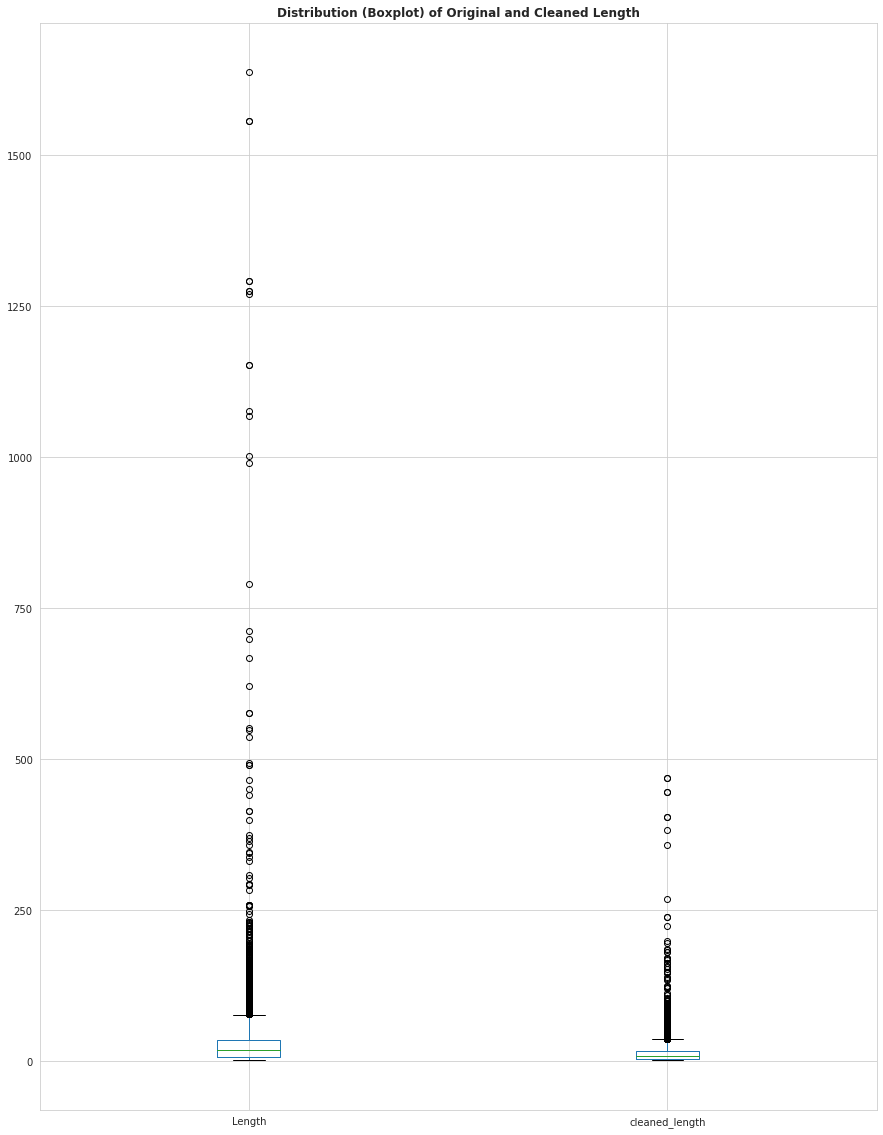

In [0]:
# comparing the boxplt for 'length' and 'cleaned_length' to see the results at overall level

mydata.boxplot(column=['Length', 'cleaned_length'])
plt.gcf().set_size_inches(15, 20)
plt.title('Distribution (Boxplot) of Original and Cleaned Length', fontweight='bold')
plt.show()

Observation:

1.   Outliers and skewness has improved while min/max/avg values have also improved in 'cleaned_length'.

In [0]:
# reviewing the EDA results for 'Length' using the custom function for EDA

group_len_cln_df = pd.DataFrame.from_records(EDA_custom_classlevel('Group','cleaned_length','Cleaned'),columns=eda_class_col)

# converting the data types for diplaying values as integers

group_len_cln_df['Q1'] = group_len_cln_df.Q1.astype('int64')
group_len_cln_df['Q2'] = group_len_cln_df.Q2.astype('int64')
group_len_cln_df['Q3'] = group_len_cln_df.Q3.astype('int64')
group_len_cln_df['Avg'] = group_len_cln_df.Avg.astype('int64')

# displaying distribution of 'Length' at 'Group' level.
# since this is only tabular representation all the groups are considered

pd.set_option("display.max_rows", None, "display.max_columns", None)
group_len_cln_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
Group,0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,48,56,57,58,59,60,61,32,62,63,64,65,66,67,68,69,70,71,72,73
No.of Obs.,3974,31,200,100,129,184,68,661,252,140,30,257,145,118,39,85,81,88,215,241,36,29,31,25,289,116,56,18,44,97,23,66,107,61,2,15,16,3,19,45,40,37,5,15,35,6,27,6,14,8,9,11,2,8,8,3,2,3,6,20,2,4,25,3,2,11,4,2,3,2,2,2,2,2
Mix,46.94,0.37,2.36,1.18,1.52,2.17,0.8,7.81,2.98,1.65,0.35,3.04,1.71,1.39,0.46,1,0.96,1.04,2.54,2.85,0.43,0.34,0.37,0.3,3.41,1.37,0.66,0.21,0.52,1.15,0.27,0.78,1.26,0.72,0.02,0.18,0.19,0.04,0.22,0.53,0.47,0.44,0.06,0.18,0.41,0.07,0.32,0.07,0.17,0.09,0.11,0.13,0.02,0.09,0.09,0.04,0.02,0.04,0.07,0.24,0.02,0.05,0.3,0.04,0.02,0.13,0.05,0.02,0.04,0.02,0.02,0.02,0.02,0.02
Length,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned,Cleaned
Min,1,4,2,3,3,3,2,3,3,3,6,2,2,3,2,5,6,3,2,2,7,5,3,3,1,3,3,2,3,1,1,1,1,1,15,2,6,8,8,5,4,4,17,3,3,7,3,8,3,8,7,5,28,5,1,8,3,10,5,3,9,7,2,5,33,9,2,21,12,96,13,16,2,31
Q1,3,7,5,9,4,3,10,3,3,6,12,8,12,8,12,12,6,11,6,9,10,12,11,8,3,9,9,6,7,11,1,2,6,6,15,3,9,8,8,14,12,8,18,9,5,14,4,14,5,15,14,7,28,8,1,24,4,10,19,5,9,10,9,11,33,13,8,21,14,97,13,20,2,31
Q2,6,9,9,14,4,5,12,6,3,7,17,13,20,14,20,19,6,19,10,16,21,19,15,17,3,15,19,11,11,17,1,3,10,11,15,4,15,9,13,17,19,11,26,23,13,14,6,19,10,20,16,10,29,11,1,40,6,11,40,5,9,13,14,18,33,18,10,21,17,99,13,25,3,31
Q3,14,14,18,23,8,10,19,15,5,21,33,19,33,24,29,26,8,32,18,34,36,27,21,36,5,25,32,19,13,27,3,5,17,18,15,8,22,23,40,26,28,16,33,31,20,16,13,22,14,27,24,20,30,16,2,62,7,13,48,6,9,18,20,19,33,27,13,21,18,100,13,30,4,31
Max,181,56,195,88,80,93,43,81,99,77,102,238,104,140,64,73,37,121,81,469,70,58,46,62,33,80,358,30,71,81,171,148,97,55,15,49,49,37,445,82,96,69,38,58,89,23,76,30,94,41,49,36,31,17,136,85,9,15,55,36,9,29,469,20,33,43,22,21,19,102,13,35,5,31
Avg,10,15,16,19,9,9,14,14,9,14,25,17,23,19,22,20,8,24,14,37,26,22,16,23,5,19,30,13,13,20,15,7,15,13,15,10,17,18,44,21,25,13,26,24,15,15,13,18,21,22,20,14,29,11,18,44,6,12,33,8,9,15,48,14,33,21,11,21,16,99,13,25,3,31


In [0]:
# concatenating original and cleaned length dataframes to do comparative analysis

group_len_df = pd.concat([group_len_org_df, group_len_cln_df], ignore_index=True)

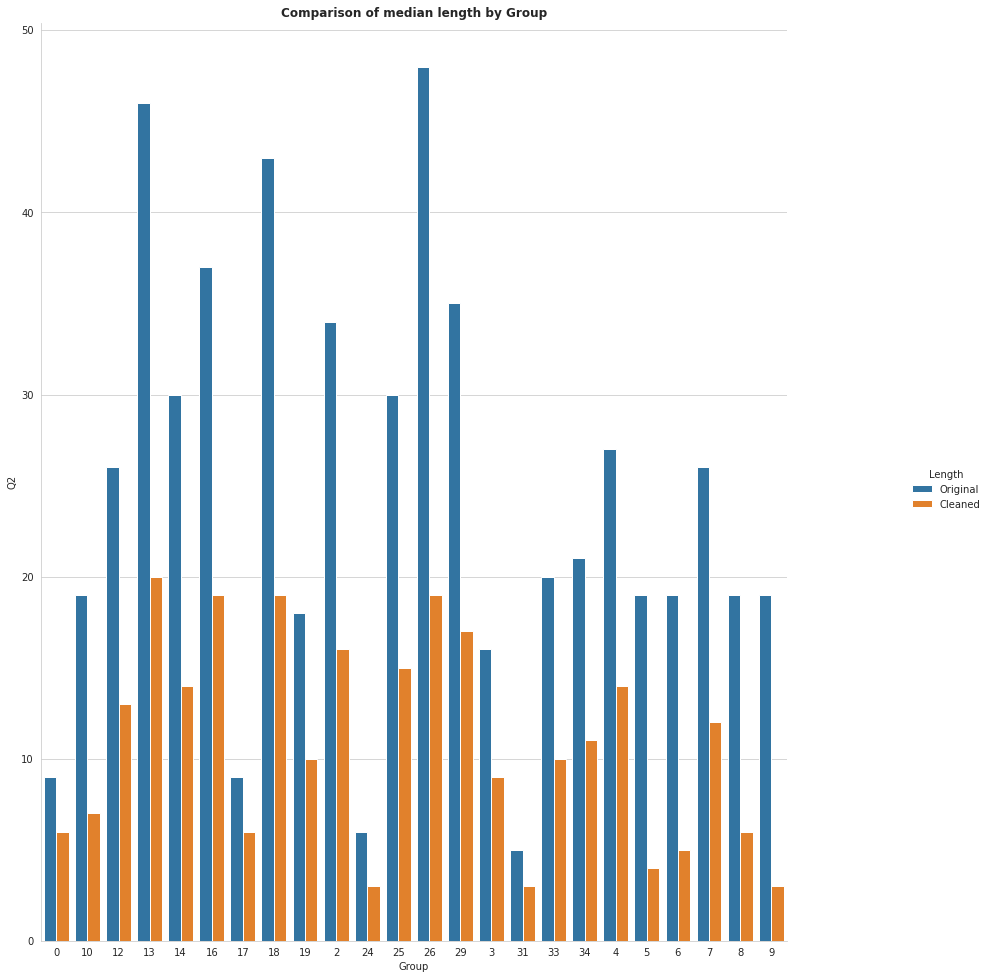

In [0]:
# comparing the impact of text processing on length of the description for the topgroup

sns.catplot(x="Group", y='Q2',hue="Length",data=group_len_df[group_len_df.Group.isin(topgroup_list)], kind="bar",orient='v');
plt.title('Comparison of median length by Group', fontweight='bold')
plt.gcf().set_size_inches(15, 15)
plt.show()


In [0]:
# checking what is the right maxlen to be set to ensure maximum coverage

maxlen= 25
cnt=0
for i in mydata['cleaned_length']:
    if(mydata.cleaned_length[i]<=maxlen):
        cnt=cnt+1
coverage = cnt/len(mydata['cleaned_length'])
print('Coverage of data for selected maxlen value :%0.2f' %(coverage*100),'%')


Coverage of data for selected maxlen value :97.65 %


In [0]:
# viewing few records from the dataframe post all cleaning

mydata.head(5)

,Group,Description,Length,cleaned_description,cleaned_length
0,0,login issue--verified user details.(employee# ...,34,login issue verified details employee manager ...,18
1,0,outlook-\r\n\r\nreceived from: hmjdrvpb.komuay...,26,outlook team meetings skype appearing calendar...,10
2,0,cant log in to vpn-\r\n\r\nreceived from: eylq...,16,cannot log vpn,3
3,0,unable to access hr_tool page,5,unable access hr tool page,5
4,0,skype error,2,skype error,2


In [0]:
# checking if there are any inconsistencies in the data ( i.e for same / similar description of issue different groups are assigned for different tickets)
# for this analysis, taking the list of cases where cleaned description value appears more than 20 times

summary = mydata[mydata['cleaned_description'].map(mydata['cleaned_description'].value_counts()) >= 20].copy(deep=True)
summary_tab=pd.crosstab(summary.cleaned_description,summary.Group)
summary_tab

Group,0,1,10,12,13,14,17,18,19,2,24,29,31,34,44,45,47,5,50,57,6,60,72,8,9
cleaned_description,,,,,,,,,,,,,,,,,,,,,,,,,
abended job scheduler,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,5,2,0,0,21,0,0,25,30
account locked,30,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
account locked ad,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
erp account locked,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
erp account unlock,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
erp password reset,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
job cold failed scheduler,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0
job failed scheduler,0,0,20,8,4,1,0,3,0,0,0,1,0,0,1,6,1,20,0,1,65,4,0,191,132
job hotf failed scheduler,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,5,0


In [0]:
# from the above filtering rows where one description has assignments to more than one group assigned across various tickets

inconsistencies = summary_tab[summary_tab.astype(bool).sum(axis=1)>1]
inconsistencies

Group,0,1,10,12,13,14,17,18,19,2,24,29,31,34,44,45,47,5,50,57,6,60,72,8,9
cleaned_description,,,,,,,,,,,,,,,,,,,,,,,,,
abended job scheduler,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,5,2,0,0,21,0,0,25,30
account locked,30,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
erp account locked,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
job failed scheduler,0,0,20,8,4,1,0,3,0,0,0,1,0,0,1,6,1,20,0,1,65,4,0,191,132
job hotf failed scheduler,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,5,0
job hr payroll na failed scheduler,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
reset passwords using password management tool,2,0,0,0,0,0,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unable connect vpn,17,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Observation:

1.   Above shows that there are significant number of cases where same description is assigned to different groups (e.g.'job failed scheduler').
2.   This will impact the model ability to classify the group as there is no clear criteria to classify the record to one group.

In [0]:
# dropping columns length,cleaned length and description

mydata.drop('Length',axis=1,inplace=True)
mydata.drop('cleaned_length',axis=1,inplace=True)
mydata.drop('Description',axis=1,inplace=True)

# swapping column order to keep the lables column the last

cols = mydata.columns.tolist()
cols = cols[-1:] + cols[:-1]
mydata=mydata[cols]

# printing few rows from the updated dataframe. this is the dataframe that will be used for further processing

mydata.head(5)

,cleaned_description,Group
0,login issue verified details employee manager ...,0
1,outlook team meetings skype appearing calendar...,0
2,cannot log vpn,0
3,unable access hr tool page,0
4,skype error,0


## 3.3 Applying Tokenizer and generating word embeddings

As an approach we will try vectorizing using various alteratives and check the impact on our model performance.

**a. Count Vectors as features**

**b. TF-IDF Vectors as features**

Word level

N-Gram level

Character level

**c. Word Embeddings as features using Glove**


While option a and b will be tried on classic ML models incl. ensembles, option c will be tried on neural networks

In [0]:
# common parameters

tt_split = 0.2
tt_seed = 100

In [0]:
# creating X, y and train / test split

X = np.asarray(mydata['cleaned_description'])
y = np.asarray(mydata['Group'])


X_train1, X_val, y_train1, y_val = train_test_split(X, y,test_size=tt_split,random_state=tt_seed)

### 3.3.1 Count Vector based approach

In [0]:
# creatting a count vectorizer object 

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X)

# transforming the training and validation data using count vectorizer object

X_train_count =  count_vect.transform(X_train1)
X_valid_count =  count_vect.transform(X_val)

print('X_train_count dataset shape:',X_train_count.shape)
print('X_valid_count dataset shape:',X_valid_count.shape)

X_train_count dataset shape: (6773, 12264)
X_valid_count dataset shape: (1694, 12264)


### 3.3.2 TF-IDF based approach

TF-IDF Vectors can be generated at different levels of input tokens (words, characters, n-grams)

1. **Word Level TF-IDF :** Matrix representing tf-idf scores of every term in different documents
2. **N-gram Level TF-IDF** : N-grams are the combination of N terms together. This Matrix representing tf-idf scores of N-grams
3. **Character Level TF-IDF** : Matrix representing tf-idf scores of character level n-grams in the corpus

In [0]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(X)
X_train_tfidf =  tfidf_vect.transform(X_train1)
X_valid_tfidf =  tfidf_vect.transform(X_val)

print('X_train_tfidf dataset shape:',X_train_tfidf.shape)
print('X_valid_tfidf dataset shape:',X_valid_tfidf.shape)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(X)
X_train_tfidf_ngram =  tfidf_vect_ngram.transform(X_train1)
X_valid_tfidf_ngram =  tfidf_vect_ngram.transform(X_val)

print('X_train_tfidf_ngram dataset shape:',X_train_tfidf_ngram.shape)
print('X_valid_tfidf_ngram dataset shape:',X_valid_tfidf_ngram.shape)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(X)
X_train_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train1) 
X_valid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_val) 

print('X_train_tfidf_ngram_chars dataset shape:',X_train_tfidf_ngram_chars.shape)
print('X_valid_tfidf_ngram_chars dataset shape:',X_valid_tfidf_ngram_chars.shape)

X_train_tfidf dataset shape: (6773, 5000)
X_valid_tfidf dataset shape: (1694, 5000)
X_train_tfidf_ngram dataset shape: (6773, 5000)
X_valid_tfidf_ngram dataset shape: (1694, 5000)
X_train_tfidf_ngram_chars dataset shape: (6773, 5000)
X_valid_tfidf_ngram_chars dataset shape: (1694, 5000)


### 3.3.3 Glove embedding - Keras based approach  

In [0]:
# setting up parameters 

max_features = 10000

# initializing tokenizer and fitting on cleaned description

tokenizer = Tokenizer(num_words=max_features,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',\
                      lower=True,split=' ', char_level=False, oov_token=None, document_count=0)
tokenizer.fit_on_texts(mydata['cleaned_description'])
word_index = tokenizer.word_index


In [0]:
# creating word dictionary

word_dict = {}
word_dict =tokenizer.word_counts

In [0]:
# creating a daraframe to analyze the word dictionary

df_worddict = pd.DataFrame.from_dict(word_dict, orient='index',columns=['Count'])
df_worddict.reset_index(inplace=True)
df_worddict.rename(columns={'index': 'Words'}, inplace=True)

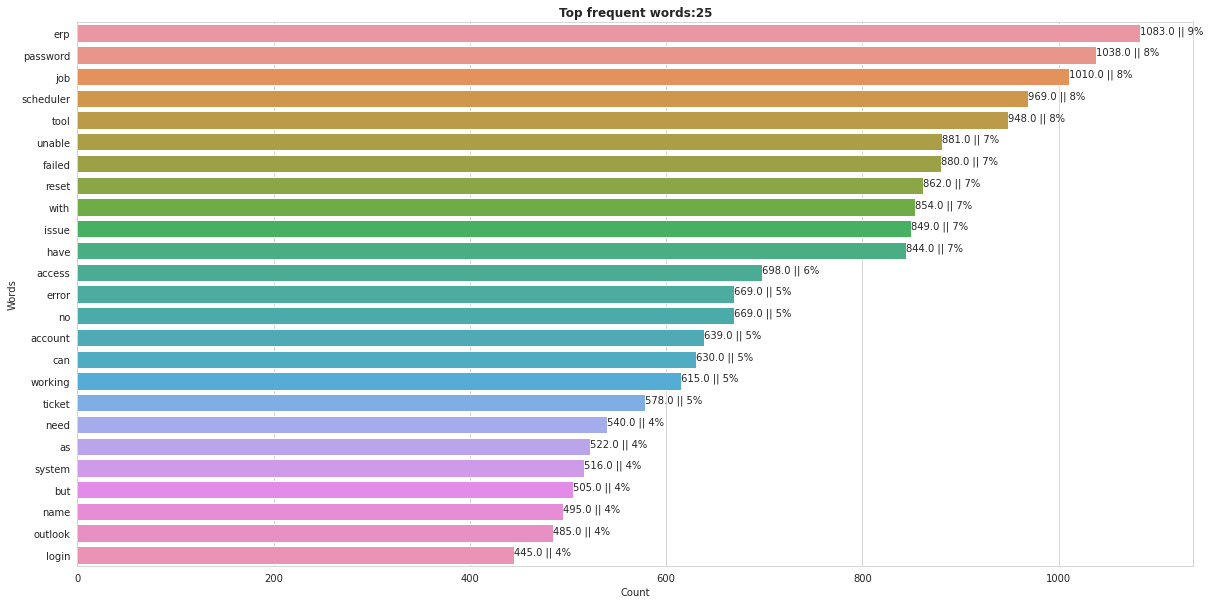

In [0]:
# creating barplot to view the top 25 frequent words

curattr = 'Words'
topcount = 25

temp = df_worddict.nlargest(topcount, 'Count')
plt.figure(figsize=(20,10))
plt.title('Top frequent words:'+str(topcount), fontweight='bold')
total=len(df_worddict[curattr])
g=sns.barplot(data=temp,y=curattr,x='Count')

# annotating to display count and % to total

for p in g.patches:
    width, height =p.get_width(),p.get_height()    
    cnt ='{}'.format(width)
    mix ='{0:.0%}'.format(width/total)
    disp = cnt+' || '+mix
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    g.annotate(disp,(x,y))

plt.show()

In [0]:
# reviewing smallest 20 words as well

df_worddict.nsmallest(20, 'Count').style.hide_index()

Words,Count
mountpoint,1
psa,1
sgxqsuojr,1
xwbesorf,1
undocking,1
prtjc,1
wihuyjdo,1
qpogfwkb,1
prqos,1
anwmfvlgenkataramdntyana,1


Observation:

1.   All these seem to have count 1 and most of it seem to not meaningful words (except a few).
2.   We need to check how many such words are there where frequency is only 1.

In [0]:
low_count_thres = 2
cnt=tot_cnt=freq=tot_freq=0


for key,value in tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<low_count_thres):
        cnt=cnt+1
        freq=freq+value

rarewords = (cnt/tot_cnt)
coverage = (freq/tot_freq)

print('Number of low count words (word count < threshold) : ', cnt)
print('Total number of rows in the dict.: ',tot_cnt)    
print('Percentage of low count words in vocabulary  :%0.2f' %(rarewords*100),'%')
print('Percentage of coverage of low count words :%0.2f' %(coverage*100),'%')


Number of low count words (word count < threshold) :  6567
Total number of rows in the dict.:  12264
Percentage of low count words in vocabulary  :53.55 %
Percentage of coverage of low count words :5.57 %


Observation:

1.   Low count words ( words with frequency of 1) constitute 53.6% of vocabulary but have only 5.6% occurance.
2.   Hence these words can be dropped from the word dictionary.

In [0]:
# dropping rare words ( words with frequency of 1)

low_count_words = [w for w,c in tokenizer.word_counts.items() if c < low_count_thres]
for w in low_count_words:
    del tokenizer.word_index[w]
    del tokenizer.word_docs[w]
    del tokenizer.word_counts[w]

print("Number of words (with frequency as 1) removed:",len(low_count_words))

Number of words (with frequency as 1) removed: 6567


In [0]:
# sorting the dictionary based on value count

word_dict_sorted = {k: v for k, v in sorted(word_dict.items(), key=lambda x: x[1],reverse=True)}

# printing top 20 word and id

list(word_dict_sorted.items())[:20]

[('erp', 1083),
 ('password', 1038),
 ('job', 1010),
 ('scheduler', 969),
 ('tool', 948),
 ('unable', 881),
 ('failed', 880),
 ('reset', 862),
 ('with', 854),
 ('issue', 849),
 ('have', 844),
 ('access', 698),
 ('error', 669),
 ('no', 669),
 ('account', 639),
 ('can', 630),
 ('working', 615),
 ('ticket', 578),
 ('need', 540),
 ('as', 522)]

In [0]:
# printing bottom 20 word and id

list(word_dict_sorted.items())[-20:]

[('fim', 2),
 ('miiserver', 2),
 ('prgthyuulla', 2),
 ('mdm', 2),
 ('workgroup', 2),
 ('localhost', 2),
 ('altogether', 2),
 ('kantenverrunden', 2),
 ('sammelarbpl', 2),
 ('doubleklick', 2),
 ('measurement', 2),
 ('inserts', 2),
 ('slt', 2),
 ('rushethryli', 2),
 ('mohnrysu', 2),
 ('mondhrbaz', 2),
 ('wqinjkxs', 2),
 ('azoyklqe', 2),
 ('pasgryowski', 2),
 ('pressing', 2)]

In [0]:
# getting the vocabulary size

vocab_size = max(list(word_index.values())) + 1
print('Vocabulary size:',vocab_size)

Vocabulary size: 5698


In [0]:
# getting the glove 6B 200 vector weights - reading the appropriate file and creating embedding dict

EMBEDDING_FILE_nn = "glove.6B.200d.txt"

embeddings_nn = {}
for o in open(EMBEDDING_FILE_nn):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    embeddings_nn[word] = embd


len(embeddings_nn.values())

400000

In [0]:
embedding_size = 200

# creating embedding matrix

embedding_matrix_nn = np.zeros((vocab_size, embedding_size))

for word, i in tokenizer.word_index.items():
    embedding_vector_nn = embeddings_nn.get(word)
    if ((embedding_vector_nn is not None) ):
        embedding_matrix_nn[i] = embedding_vector_nn

print(embedding_matrix_nn.shape)

(5698, 200)


In [0]:
# printing embedding matrix for one sample 

print(embedding_matrix_nn[91])

[ 0.40814     0.0061589  -0.58595002 -0.30763999 -0.30952999  0.80024999
  0.1506      0.037176    0.15274     0.11146    -0.19167     0.77292001
 -0.46686    -0.20789     0.30282    -0.079749   -0.051627    0.16777
 -0.097824   -0.086089    0.45524001  2.67030001 -0.76695001 -0.062484
  0.25521001  0.48973     0.58829999  1.08070004  0.08931     0.64016002
  0.099414   -0.23373    -0.53358001 -0.41207999 -0.094993   -0.14291
 -0.47503999  0.077906   -0.69700003  0.024655    0.52421999 -0.51704001
 -0.032265    0.12106    -0.018469   -0.18023001  0.44007999 -0.069142
 -0.11208    -0.076492    0.38525999  0.92208999 -0.088213   -0.0029341
 -0.052192    0.34336001  0.29914001  0.073222   -0.054287   -0.45796999
  0.57832998  0.49860999 -0.23296     0.15363     0.55202001 -0.029864
  0.099822    0.86578    -0.53878999 -0.41653001  0.45216     0.32659999
 -0.10058     0.19493     0.34060001  1.24430001  0.54320002  0.24196
 -0.50347    -0.2474     -0.3387     -0.10535     0.31862    -0.066

In [0]:
# converting the text to sequence and padding based on the parameter length setup

X = tokenizer.texts_to_sequences(mydata['cleaned_description'])
X = pad_sequences(X, maxlen = maxlen,padding='post')
y_1D = np.asarray(mydata['Group'])

# converting target class to onehot encoded

y = tf.keras.utils.to_categorical(mydata['Group'])

#checking the shape of dataset 

print('X dataset shape:',X.shape)
print('y_1D dataset shape:',y_1D.shape)
print('y dataset shape:',y.shape)



X dataset shape: (8467, 25)
y_1D dataset shape: (8467,)
y dataset shape: (8467, 74)


In [0]:
# checking 1 record from the dataset

print('Record at Index # 0 for X:', X[0],end='\n\n')

print('Record at Index # 0 for y_1D:',y_1D[0],end='\n\n')

print('Record at Index # 0 for y:',y[0],end='\n\n')

Record at Index # 0 for X: [ 25  10 109 125 172  58  23 256 199   8   2 428  45 257 203  99  32 177
   0   0   0   0   0   0   0]

Record at Index # 0 for y_1D: 0

Record at Index # 0 for y: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]



In [0]:
#creating train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=tt_split,random_state=tt_seed,shuffle=True)

In [0]:
#checking the shape of train test split dataset 

print('X_train dataset shape:',X_train.shape)
print('y_train dataset shape:',y_train.shape)
print('X_test dataset shape:',X_test.shape)
print('y_test dataset shape:',y_test.shape)

X_train dataset shape: (6773, 25)
y_train dataset shape: (6773, 74)
X_test dataset shape: (1694, 25)
y_test dataset shape: (1694, 74)


In [0]:
#checking if all the classes ( target ) have been represented in the train dataset

y_train_1D = np.argmax(y_train, axis=1)
y_test_1D = np.argmax(y_test, axis=1)
values, counts = np.unique(y_train_1D, return_counts=True)
print(values)
print(counts)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
[3180   25  195  161   79  104  150   51  532  205  110   25  200  116
   92   31   60   67   72  164   29   23   19   19  234   92   50   16
   38   74   18   57    3   85   55    2   14   13    3   15   35   29
   31    4   12   29    4   19    5    4   11    6    6    8    2    7
    2    1    3    6   18    2   22    3    1    8    2    2    3    2
    2    2    2    2]


Observation:

1.   All the 74 classes have been represented in training dataset.
2.   However classes are highly imbalanced.
2.   Class imbalance handling using SMOTE gave error (n_samples < neighbors).
2.   Class imbalance handling using Randomupsampling resulted in overfitting of training datasets and also exploding the records count ( as each class with count less than 3180 will need to be upsampled to 3180 across all classes).
2.   Hence class_weight option is used to handle class imbalance.

In [0]:
# creating class weight for handling class imbalance issue 

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train_1D), y_train_1D)
d_class_weights = dict(enumerate(class_weights))
df_classweights = pd.DataFrame.from_dict(d_class_weights, orient='index',columns=['Class Weight'])

# reviewing the class weight across various classes

df_classweights.head(80)

,Class Weight
0,0.028782
1,3.661081
2,0.469369
3,0.568491
4,1.158570
5,0.880068
6,0.610180
7,1.794648
8,0.172043
9,0.446473


Observation:

1.   Class weights are assigned in inverse propotion to the count ( height occurance gets lowest weight).
2.   Class with highest occurance (0) has been given lowest weightage.

# **04. Milestone 2:** Model Building

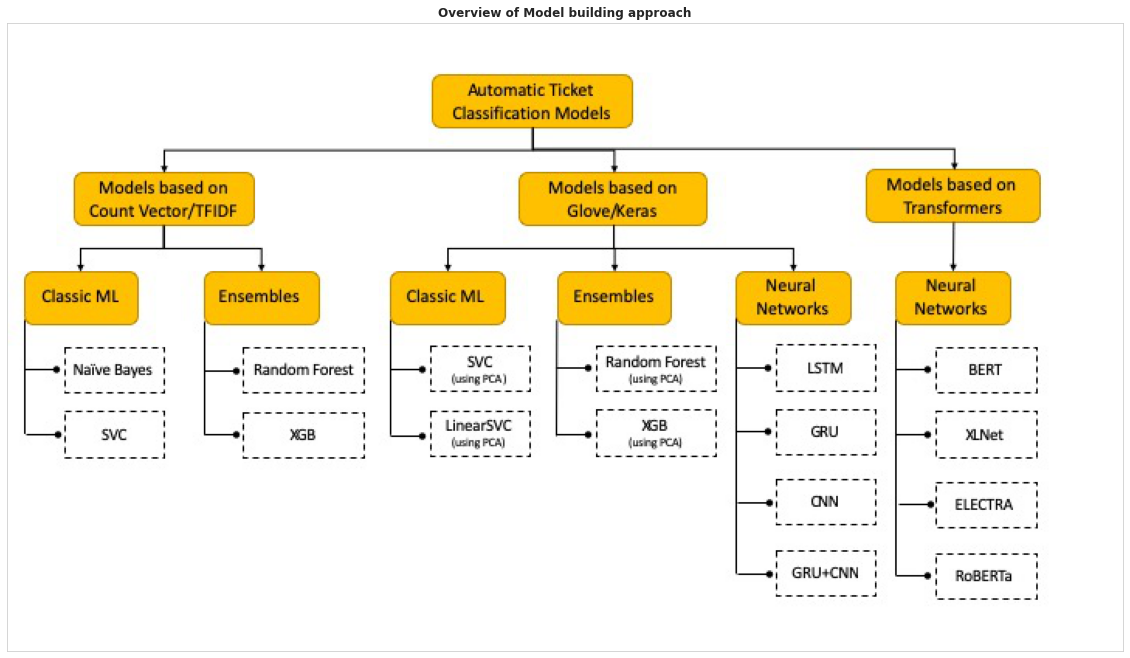

In [0]:
# visual representation of various approches used in model building

image = plt.imread('Models.jpg')
plt.xticks([]), plt.yticks([])
plt.imshow(image)
plt.gcf().set_size_inches(20, 15)
plt.title('Overview of Model building approach', fontweight='bold')
plt.show()

Creating common functions

In [0]:
# defining custom function to return matrices 

def calc_metrices(yt,yp):
  accuracy_score = metrics.accuracy_score(yt,yp)
  recall_score = metrics.recall_score(yt,yp,labels=None,pos_label=1,average='weighted',sample_weight=None)
  precision_score = metrics.precision_score(yt,yp,labels=None,pos_label=1,average='weighted',sample_weight=None)
  f1_score = metrics.f1_score(yt,yp,labels=None,pos_label=1,average='weighted',sample_weight=None)
  mcc = metrics.matthews_corrcoef(yt, yp, sample_weight=None)
  return accuracy_score,recall_score,precision_score,f1_score,mcc

In [0]:
# function to return predictions based on model inputs sent. this is used for Count vector / TF-IDF vector based models

def train_model(classifier, feature_vector_train, label, feature_vector_valid,is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return predictions

In [0]:
# defining custom function to return plots 

def show_graph(train_loss,val_loss,train_acc,val_acc):
  figure_obj = plt.figure(figsize = (15,25))

  epochs = range(0, len(train_loss))
  ax1 = figure_obj.add_subplot(3,2,1)   
  ax1.plot(epochs, train_loss, label='Training_loss', color = 'orange')
  ax1.plot(epochs, val_loss, label='Validation_loss', color = 'blue')
  ax1.legend(loc='best')
  ax1.set_xlabel("Epochs")
  ax1.set_ylabel("Loss")
  ax1.title.set_text('Model Loss-'+ modelname)

  ax2 = figure_obj.add_subplot(3,2,2)
  ax2.plot(epochs, train_acc, label='Training_Accuracy', color = 'orange')
  ax2.plot(epochs, val_acc, label='Validation_Accuracy', color = 'blue')
  ax2.legend(loc='best')
  ax2.set_xlabel("Epochs")
  ax2.set_ylabel("Accuracy")
  ax2.title.set_text('Model Accuracy-'+ modelname)
  return plt.show()

In [0]:
# defining custom function to store evaluation results for comparative purpose

df_result = pd.DataFrame(columns=['Model','Variant','Accuracy','MCC','Precision','Recall','F1'])

def storeresult(mname,mvar,acc,mcc,pre,rec,f1):
  global df_result
  res = {'Model':mname,'Variant':mvar,'Accuracy':acc,'MCC':mcc,'Precision':pre,'Recall':rec,'F1':f1} 
  df_result = df_result.append(res,ignore_index=True)

In [0]:
# common parameter for random seeding

seed=99

### 4.1.Models based on Count Vector and TF-IDF Vector

#### 4.1.1 Naive Bayes Classification Model

In [0]:
## Naive Bayes on Count Vectors

# executing the model and storing the result
predictions = train_model(MultinomialNB(), X_train_count, y_train1, X_valid_count)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('Multinomial NB','Count Vector',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('NB-Count Vectors Accuracy  :%0.2f' %(accuracy_score*100),'%')

## Naive Bayes on Word Level TF IDF Vectors

# executing the model and storing the result
predictions = train_model(MultinomialNB(),X_train_tfidf, y_train1, X_valid_tfidf)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('Multinomial NB','WordLevel TF-IDF',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('NB-WordLevel TF-IDF Accuracy  :%0.2f' %(accuracy_score*100),'%')

## Naive Bayes on Ngram Level TF IDF Vectors

# executing the model and storing the result
predictions = train_model(MultinomialNB(),X_train_tfidf_ngram, y_train1, X_valid_tfidf_ngram)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('Multinomial NB','N-Gram TF-IDF',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('NB-N-Gram TF-IDF Vectors Accuracy  :%0.2f' %(accuracy_score*100),'%')


## Naive Bayes on Character Level TF IDF Vectors

# executing the model and storing the result
predictions = train_model(MultinomialNB(), X_train_tfidf_ngram_chars, y_train1, X_valid_tfidf_ngram_chars)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('Multinomial NB','CharLevel TF-IDF',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('NB-CharLevel TF-IDF Vectors Accuracy  :%0.2f' %(accuracy_score*100),'%')

NB-Count Vectors Accuracy  :61.33 %
NB-WordLevel TF-IDF Accuracy  :57.44 %
NB-N-Gram TF-IDF Vectors Accuracy  :58.15 %
NB-CharLevel TF-IDF Vectors Accuracy  :56.49 %


#### 4.1.2 SVC Classification Model

In [0]:
## SVC on Count Vectors

# executing the model and storing the result
predictions = train_model(SVC(random_state = seed), X_train_count, y_train1, X_valid_count)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('SVC','Count Vector',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('SVC-Count Vectors Accuracy  :%0.2f' %(accuracy_score*100),'%')

## SVC on Word Level TF IDF Vectors

# executing the model and storing the result
predictions = train_model(SVC(random_state = seed),X_train_tfidf, y_train1, X_valid_tfidf)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('SVC','WordLevel TF-IDF',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('SVC-WordLevel TF-IDF Accuracy  :%0.2f' %(accuracy_score*100),'%')
                            

## SVC on Ngram Level TF IDF Vectors

# executing the model and storing the result
predictions = train_model(SVC(random_state = seed),X_train_tfidf_ngram, y_train1, X_valid_tfidf_ngram)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('SVC','N-Gram TF-IDF',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('SVC-N-Gram TF-IDF Vectors Accuracy  :%0.2f' %(accuracy_score*100),'%')


## SVC on Character Level TF IDF Vectors

# executing the model and storing the result
predictions = train_model(SVC(random_state = seed), X_train_tfidf_ngram_chars, y_train1, X_valid_tfidf_ngram_chars)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('SVC','CharLevel TF-IDF',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('SVC-CharLevel TF-IDF Vectors Accuracy  :%0.2f' %(accuracy_score*100),'%')

SVC-Count Vectors Accuracy  :61.04 %
SVC-WordLevel TF-IDF Accuracy  :62.51 %
SVC-N-Gram TF-IDF Vectors Accuracy  :59.80 %
SVC-CharLevel TF-IDF Vectors Accuracy  :63.64 %


#### 4.1.3 Ensemble - Bagging Classification Model

In [0]:
## RandomForestClassifier on Count Vectors

# executing the model and storing the result
predictions = train_model(RandomForestClassifier(random_state = seed), X_train_count, y_train1, X_valid_count)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('RandomForestClassifier','Count Vector',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('RandomForestClassifier-Count Vectors Accuracy  :%0.2f' %(accuracy_score*100),'%')

## RandomForestClassifier on Word Level TF IDF Vectors

# executing the model and storing the result
predictions = train_model(RandomForestClassifier(random_state = seed),X_train_tfidf, y_train1, X_valid_tfidf)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('RandomForestClassifier','WordLevel TF-IDF',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('RandomForestClassifier-WordLevel TF-IDF Accuracy  :%0.2f' %(accuracy_score*100),'%')
                             

## RandomForestClassifier on Ngram Level TF IDF Vectors

# executing the model and storing the result
predictions = train_model(RandomForestClassifier(random_state = seed),X_train_tfidf_ngram, y_train1, X_valid_tfidf_ngram)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('RandomForestClassifier','N-Gram TF-IDF',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('RandomForestClassifier-N-Gram TF-IDF Vectors Accuracy  :%0.2f' %(accuracy_score*100),'%')


## RandomForestClassifier on Character Level TF IDF Vectors

# executing the model and storing the result
predictions = train_model(RandomForestClassifier(random_state = seed), X_train_tfidf_ngram_chars, y_train1, X_valid_tfidf_ngram_chars)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('RandomForestClassifier','CharLevel TF-IDF',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('RandomForestClassifier-CharLevel TF-IDF Vectors Accuracy  :%0.2f' %(accuracy_score*100),'%')

RandomForestClassifier-Count Vectors Accuracy  :63.64 %
RandomForestClassifier-WordLevel TF-IDF Accuracy  :65.41 %
RandomForestClassifier-N-Gram TF-IDF Vectors Accuracy  :60.45 %
RandomForestClassifier-CharLevel TF-IDF Vectors Accuracy  :62.10 %


#### 4.1.4 Ensemble - Boosting Classification Model

In [0]:
## XGBClassifier on Count Vectors

# executing the model and storing the result
predictions = train_model(XGBClassifier(random_state =seed), X_train_count, y_train1, X_valid_count)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('XGBClassifier','Count Vector',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('XGBClassifier-Count Vectors Accuracy  :%0.2f' %(accuracy_score*100),'%')


## XGBClassifier on Word Level TF IDF Vectors

# executing the model and storing the result
predictions = train_model(XGBClassifier(random_state =seed),X_train_tfidf, y_train1, X_valid_tfidf)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('XGBClassifier','WordLevel TF-IDF',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('XGBClassifier-WordLevel TF-IDF Accuracy  :%0.2f' %(accuracy_score*100),'%')

                             

## XGBClassifier on Ngram Level TF IDF Vectors

# executing the model and storing the result
predictions = train_model(XGBClassifier(random_state =seed),X_train_tfidf_ngram, y_train1, X_valid_tfidf_ngram)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('XGBClassifier','N-Gram TF-IDF',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('XGBClassifier-N-Gram TF-IDF Vectors Accuracy  :%0.2f' %(accuracy_score*100),'%')


## XGBClassifier on Character Level TF IDF Vectors

# executing the model and storing the result
predictions = train_model(XGBClassifier(random_state = seed), X_train_tfidf_ngram_chars, y_train1, X_valid_tfidf_ngram_chars)
accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_val,predictions)
storeresult ('XGBClassifier','CharLevel TF-IDF',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 
print('XGBClassifier-CharLevel TF-IDF Vectors Accuracy  :%0.2f' %(accuracy_score*100),'%')

XGBClassifier-Count Vectors Accuracy  :65.58 %
XGBClassifier-WordLevel TF-IDF Accuracy  :64.70 %
XGBClassifier-N-Gram TF-IDF Vectors Accuracy  :58.80 %
XGBClassifier-CharLevel TF-IDF Vectors Accuracy  :64.94 %


### 4.2.Models based on Glove embedding (Keras)

In [0]:
# common embedding parameters for the model

input_dim=vocab_size
output_dim=embedding_size
input_length=maxlen

# other common parameters for the model

EPOCHS = 50
BATCH_SIZE = 32
lstm_units = 128
gru_units = 128
optimizer = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=True)
loss = 'categorical_crossentropy'
metrics_model='accuracy'


#### 4.2.1 Bidirectional LSTM Classification Model

Model Summary - Bidirectional-LSTM

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 200)           1139600   
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 256)           336896    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 74)                19018     
Total params: 1,495,514
Trainable params: 1,495,514
Non-trainable params: 0
_________________________________________________________________
None


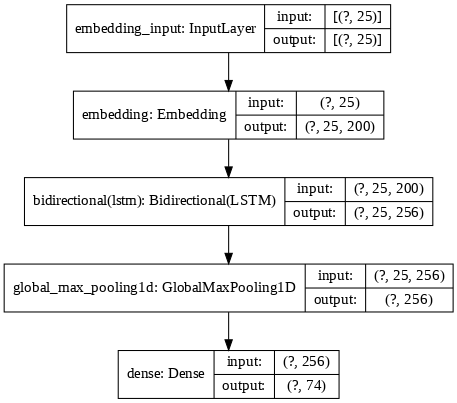

In [0]:
# defining model - Bidirectional LSTM - Base model without any regularization

modelname='Bidirectional-LSTM'

# clearing the session and seeding randomness

clear_session()
np.random.seed(seed)
random.set_seed(seed)

# defining the model

model = Sequential() 
model.add(Embedding(input_dim=input_dim,output_dim=output_dim,input_length=input_length,weights = [embedding_matrix_nn]))
model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dense(74, activation='softmax')) 

model.compile(loss=loss,optimizer=optimizer, metrics=metrics_model) 

# printing the model summary

print('Model Summary -',modelname,end='\n\n')
print(model.summary())

# viewing the model architecure graphically

plot_model(model, to_file= modelname+'.png', show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=True, dpi=75)

Epoch 1/50
212/212 - 4s - loss: 4.2628 - accuracy: 0.0920 - val_loss: 3.8021 - val_accuracy: 0.1346
Epoch 2/50
212/212 - 3s - loss: 3.3680 - accuracy: 0.2091 - val_loss: 3.4946 - val_accuracy: 0.1960
Epoch 3/50
212/212 - 3s - loss: 2.3149 - accuracy: 0.3040 - val_loss: 2.8118 - val_accuracy: 0.2845
Epoch 4/50
212/212 - 3s - loss: 1.4563 - accuracy: 0.3629 - val_loss: 2.7060 - val_accuracy: 0.2946
Epoch 5/50
212/212 - 3s - loss: 0.9628 - accuracy: 0.4493 - val_loss: 2.6966 - val_accuracy: 0.2916
Epoch 6/50
212/212 - 3s - loss: 0.6846 - accuracy: 0.5011 - val_loss: 2.3831 - val_accuracy: 0.3329
Epoch 7/50
212/212 - 3s - loss: 0.4872 - accuracy: 0.5616 - val_loss: 2.2869 - val_accuracy: 0.3589
Epoch 8/50
212/212 - 3s - loss: 0.3856 - accuracy: 0.6290 - val_loss: 2.0357 - val_accuracy: 0.4250
Epoch 9/50
212/212 - 3s - loss: 0.3215 - accuracy: 0.6567 - val_loss: 1.9771 - val_accuracy: 0.4380
Epoch 10/50
212/212 - 3s - loss: 0.2709 - accuracy: 0.6842 - val_loss: 1.8752 - val_accuracy: 0.4675

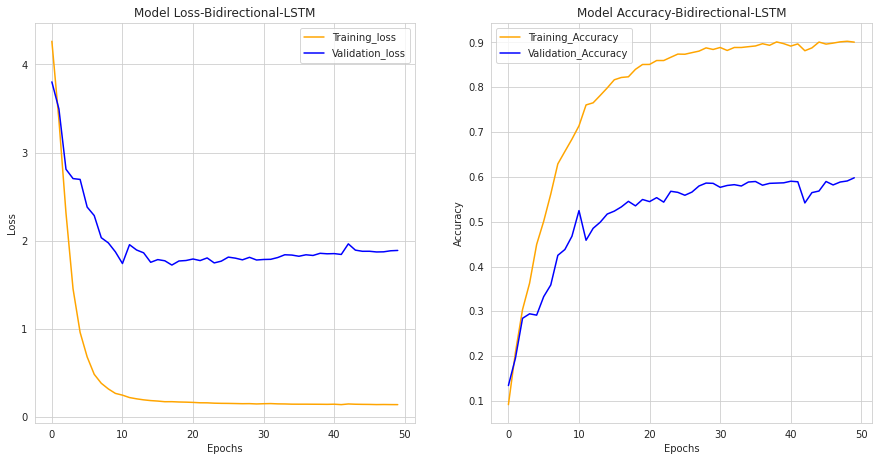

*** Evaluation Results - Bidirectional-LSTM ***

Test Accuracy  :59.80 %

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       794
           1       0.22      0.33      0.27         6
           2       0.46      0.48      0.47        46
           3       0.31      0.38      0.34        39
           4       0.33      0.29      0.31        21
           5       0.59      0.40      0.48        25
           6       0.80      0.35      0.49        34
           7       0.46      0.35      0.40        17
           8       0.80      0.47      0.59       129
           9       0.26      0.15      0.19        47
          10       0.80      0.40      0.53        30
          11       0.25      0.20      0.22         5
          12       0.62      0.54      0.58        57
          13       0.39      0.59      0.47        29
          14       0.50      0.38      0.43        26
          15       0.29      0.25     

In [0]:
# fitting the model - Bidirectional LSTM - Base model without any regularization

start_time=time.time()
model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=2,class_weight=d_class_weights)
et=round(time.time()-start_time,2)
print()
print('Model fit completed in',et, 'seconds',end='\n\n')

# printing the graph to visualize the loss and accuracy movement in training and test epoch runs

train_loss=val_loss=train_acc=val_acc=None
train_loss = model.history.history['loss']
val_loss   = model.history.history['val_loss']
train_acc  = model.history.history['accuracy']
val_acc    = model.history.history['val_accuracy']

show_graph(train_loss,val_loss,train_acc,val_acc) 

# evaluating the model  

score, acc = model.evaluate(X_test, y_test,batch_size=BATCH_SIZE,verbose=0)

# getting prediction values for X_test 

y_pred = model.predict(X_test, verbose=0)
y_pred_1D = np.argmax(y_pred, axis=1)

# evaluating the model (using sklearn metrics)

accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_test_1D,y_pred_1D)

# printing key metrics

print('*** Evaluation Results -',modelname,'***',end='\n\n')
print('Test Accuracy  :%0.2f' %(acc*100),'%',end='\n\n')
print('Classification Report:')
print(metrics.classification_report(y_test_1D, y_pred_1D),end='\n\n')

# storing the model output in dataframe for comparison purpose

storeresult (modelname,'Class balanced;Glove trained',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 

#### 4.2.2 Bidirectional GRU Classification Model

Model Summary - Bidirectional-GRU

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 200)           1139600   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               253440    
_________________________________________________________________
dense (Dense)                (None, 74)                19018     
Total params: 1,412,058
Trainable params: 1,412,058
Non-trainable params: 0
_________________________________________________________________
None


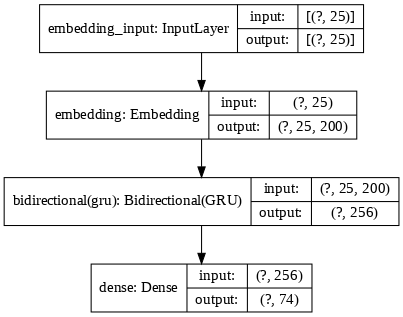

In [0]:
# defining model - Bidirectional GRU - Base model without any regularization

modelname='Bidirectional-GRU'

# clearing the session and seeding randomness

clear_session()
np.random.seed(seed)
random.set_seed(seed)

# defining the model

model = Sequential() 
model.add(Embedding(input_dim=input_dim,output_dim=output_dim,input_length=input_length,weights = [embedding_matrix_nn]))
model.add(Bidirectional(GRU(gru_units)))
model.add(Dense(74, activation='softmax')) 

model.compile(loss=loss,optimizer=optimizer, metrics=['accuracy']) 

# printing the model summary

print('Model Summary -',modelname,end='\n\n')
print(model.summary()) 

# viewing the model architecure visually

plot_model(model, to_file= modelname+'.png', show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=True, dpi=75)

Epoch 1/50
212/212 - 4s - loss: 3.8177 - accuracy: 0.1995 - val_loss: 3.4053 - val_accuracy: 0.2261
Epoch 2/50
212/212 - 3s - loss: 1.5922 - accuracy: 0.3572 - val_loss: 3.0493 - val_accuracy: 0.2385
Epoch 3/50
212/212 - 3s - loss: 0.8634 - accuracy: 0.4608 - val_loss: 2.4990 - val_accuracy: 0.3501
Epoch 4/50
212/212 - 3s - loss: 0.5599 - accuracy: 0.5213 - val_loss: 2.2883 - val_accuracy: 0.3725
Epoch 5/50
212/212 - 3s - loss: 0.4039 - accuracy: 0.6139 - val_loss: 2.2211 - val_accuracy: 0.4209
Epoch 6/50
212/212 - 3s - loss: 0.3269 - accuracy: 0.6563 - val_loss: 2.0748 - val_accuracy: 0.4416
Epoch 7/50
212/212 - 3s - loss: 0.2697 - accuracy: 0.6827 - val_loss: 2.0661 - val_accuracy: 0.4475
Epoch 8/50
212/212 - 3s - loss: 0.2455 - accuracy: 0.7283 - val_loss: 2.1215 - val_accuracy: 0.4593
Epoch 9/50
212/212 - 3s - loss: 0.2295 - accuracy: 0.7494 - val_loss: 1.9625 - val_accuracy: 0.4900
Epoch 10/50
212/212 - 3s - loss: 0.2083 - accuracy: 0.7648 - val_loss: 1.9134 - val_accuracy: 0.5094

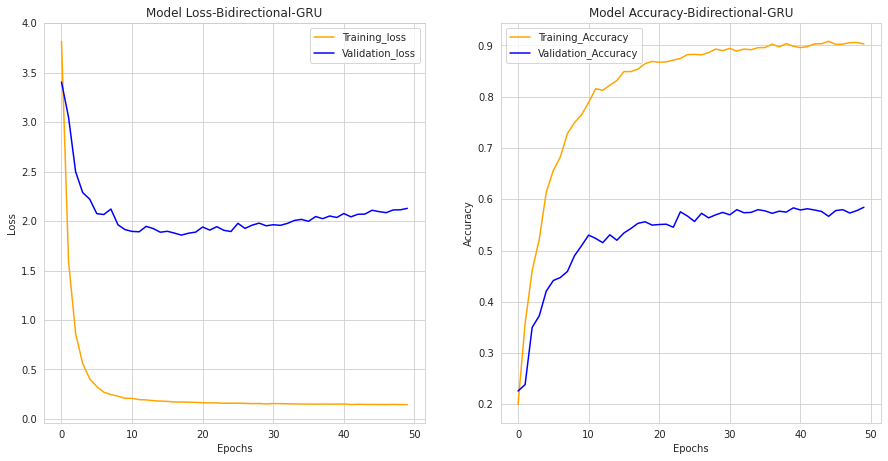

*** Evaluation Results - Bidirectional-GRU ***

Test Accuracy  :58.44 %

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       794
           1       0.22      0.33      0.27         6
           2       0.43      0.39      0.41        46
           3       0.23      0.31      0.26        39
           4       0.20      0.24      0.22        21
           5       0.43      0.40      0.42        25
           6       0.53      0.29      0.38        34
           7       0.50      0.47      0.48        17
           8       0.79      0.42      0.55       129
           9       0.26      0.19      0.22        47
          10       0.62      0.33      0.43        30
          11       0.00      0.00      0.00         5
          12       0.65      0.56      0.60        57
          13       0.49      0.66      0.56        29
          14       0.37      0.42      0.39        26
          15       0.33      0.12      

In [0]:
#fitting model - Bidirectional GRU without regularization

start_time=time.time()
model.fit(X_train, y_train,validation_data=(X_test,y_test),shuffle=True,epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=2,class_weight=d_class_weights)
et=round(time.time()-start_time,2)
print()
print('Model fit completed in',et, 'seconds')

# printing the graph to visualize the loss and accuracy movement in training and test epoch runs

train_loss=val_loss=train_acc=val_acc=None
train_loss = model.history.history['loss']
val_loss   = model.history.history['val_loss']
train_acc  = model.history.history['accuracy']
val_acc    = model.history.history['val_accuracy']

show_graph(train_loss,val_loss,train_acc,val_acc) 

# evaluating the model

score, acc = model.evaluate(X_test, y_test,batch_size=BATCH_SIZE,verbose=0)

# getting prediction values for X_test 

y_pred = model.predict(X_test, verbose=0)
y_pred_1D = np.argmax(y_pred, axis=1)

# evaluating the model (using sklearn metrics)

accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_test_1D,y_pred_1D)

# printing key metrics

print('*** Evaluation Results -',modelname,'***',end='\n\n')
print('Test Accuracy  :%0.2f' %(acc*100),'%',end='\n\n')
print('Classification Report:')
print(metrics.classification_report(y_test_1D,y_pred_1D),end='\n\n')

# storing the model output in dataframe for comparison purpose

storeresult (modelname,'Class balanced;Glove trained',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 

#### 4.2.3 CNN Classification Model

Model Summary - CNN

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 25)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 25, 200)      1139600     input_1[0][0]                    
__________________________________________________________________________________________________
reshape (Reshape)               (None, 25, 200, 1)   0           embedding[0][0]                  
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 24, 1, 512)   205312      reshape[0][0]                    
_________________________________________________________________________

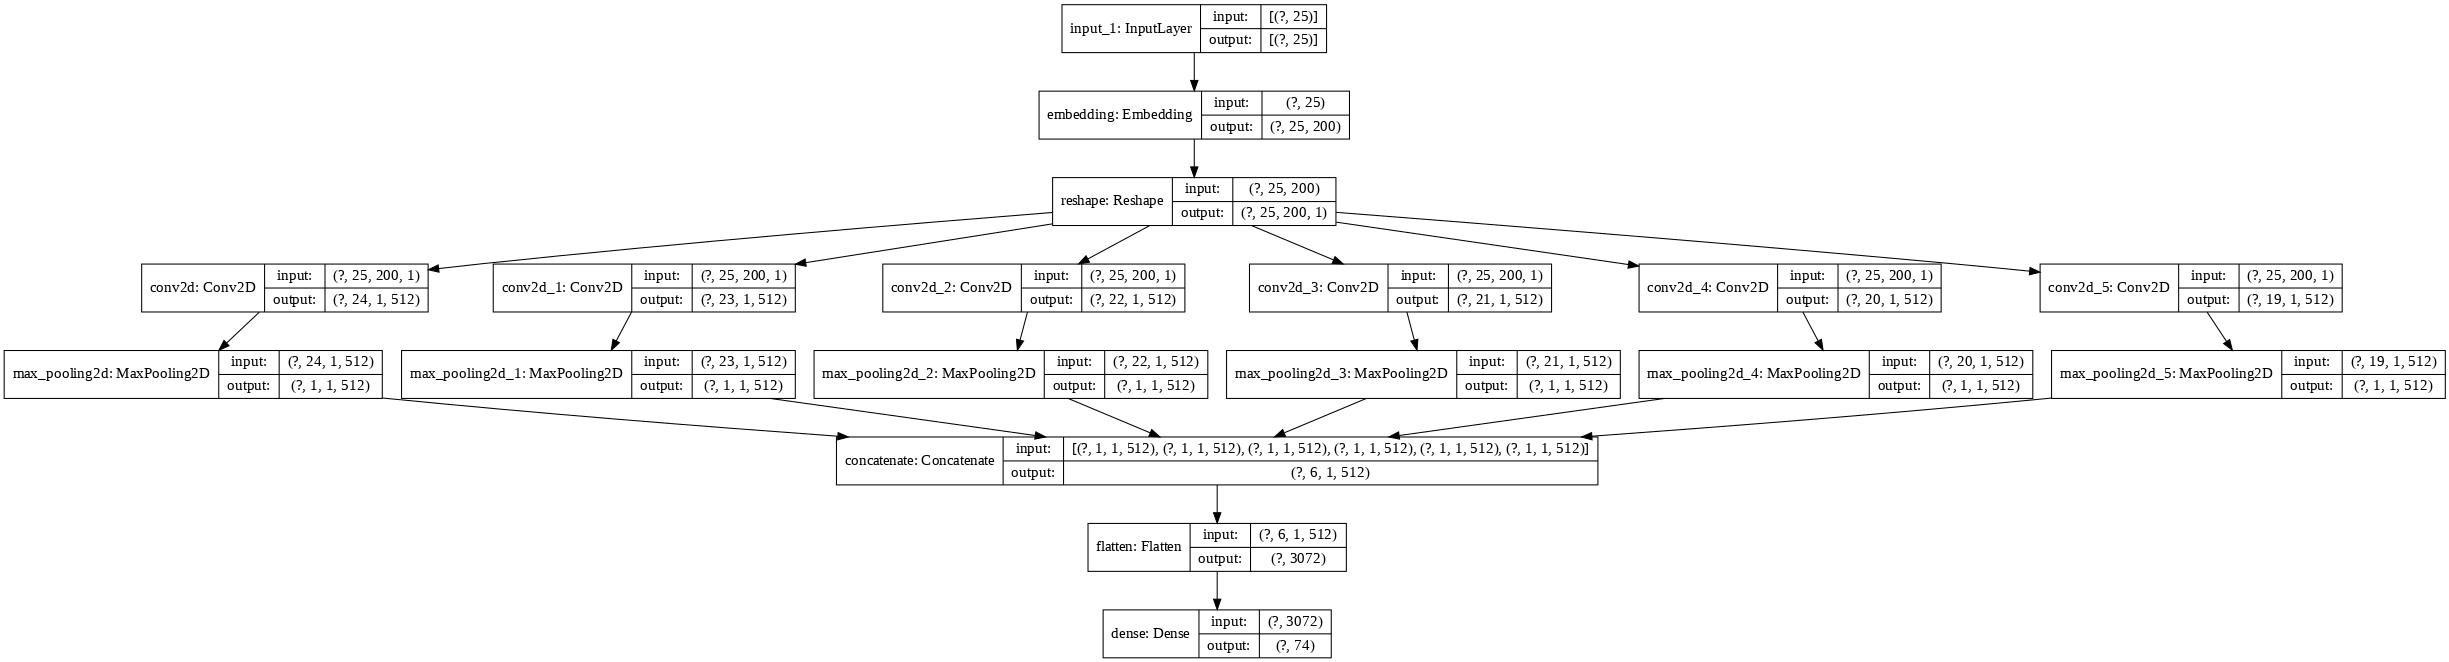

In [0]:
# defining model - CNN - Base model without any regularization

modelname='CNN'

# setting CNN specific parameters

filter_sizes = [2,3,4,5,6,7]
num_filters = 512

# clearing the session and seeding randomness
clear_session()
np.random.seed(seed)
random.set_seed(seed)

# defining the model

inputs = Input(shape=(input_length,), dtype='int32')
embedding = Embedding(input_dim=input_dim,output_dim=output_dim,weights = [embedding_matrix_nn])(inputs)
reshape = Reshape((input_length,output_dim,1))(embedding)
pools = []
for num in filter_sizes:
    conv = Conv2D(filters=num_filters, 
                    kernel_size=(num,output_dim), 
                    padding='valid',
                    kernel_initializer='normal',
                    activation='relu')(reshape)
    pool = MaxPool2D(pool_size=(input_length - num + 1, 1),
                     strides=(1,1),
                     padding='valid')(conv)
    pools.append(pool)
conc = Concatenate(axis=1)(pools)
flatten = Flatten()(conc)
output = Dense(units=74, activation='softmax')(flatten)

model = Model(inputs=inputs, outputs=output)

model.compile(loss=loss,optimizer=optimizer, metrics=metrics_model) 

# printing the model summary
print('Model Summary -',modelname,end='\n\n')
print(model.summary())

# viewing the model architecure visually
plot_model(model, to_file=modelname+'.png', show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=True, dpi=75)

Epoch 1/50
212/212 - 4s - loss: 6.9631 - accuracy: 0.1339 - val_loss: 3.6175 - val_accuracy: 0.2019
Epoch 2/50
212/212 - 4s - loss: 2.4398 - accuracy: 0.3388 - val_loss: 3.2666 - val_accuracy: 0.2715
Epoch 3/50
212/212 - 4s - loss: 1.2840 - accuracy: 0.4754 - val_loss: 2.9672 - val_accuracy: 0.3076
Epoch 4/50
212/212 - 4s - loss: 0.7364 - accuracy: 0.5795 - val_loss: 2.5934 - val_accuracy: 0.3819
Epoch 5/50
212/212 - 4s - loss: 0.5028 - accuracy: 0.6747 - val_loss: 2.3176 - val_accuracy: 0.4433
Epoch 6/50
212/212 - 4s - loss: 0.3774 - accuracy: 0.7118 - val_loss: 2.2384 - val_accuracy: 0.4917
Epoch 7/50
212/212 - 4s - loss: 0.3068 - accuracy: 0.7463 - val_loss: 2.2620 - val_accuracy: 0.4699
Epoch 8/50
212/212 - 4s - loss: 0.2789 - accuracy: 0.7852 - val_loss: 2.2975 - val_accuracy: 0.4652
Epoch 9/50
212/212 - 4s - loss: 0.2503 - accuracy: 0.7986 - val_loss: 2.1591 - val_accuracy: 0.5153
Epoch 10/50
212/212 - 4s - loss: 0.2500 - accuracy: 0.8118 - val_loss: 2.2911 - val_accuracy: 0.5012

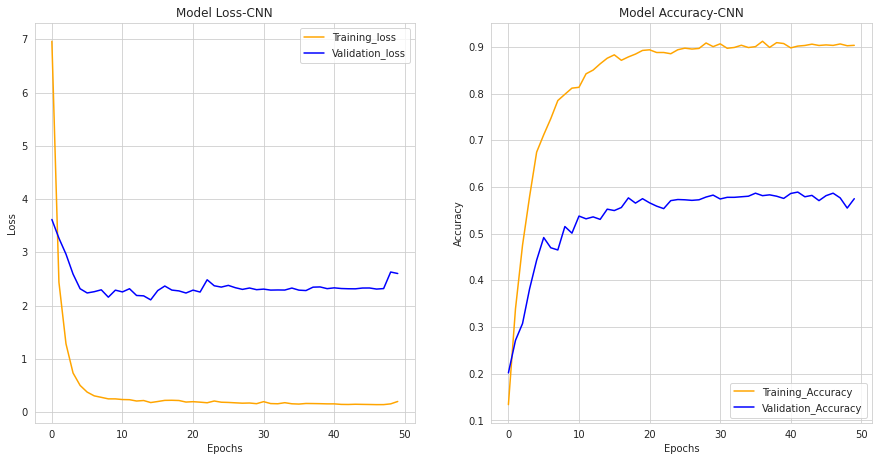

*** Evaluation Results - CNN ***

Test Accuracy  :57.50 %

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       794
           1       0.25      0.33      0.29         6
           2       0.53      0.41      0.46        46
           3       0.35      0.33      0.34        39
           4       0.33      0.14      0.20        21
           5       0.59      0.40      0.48        25
           6       0.57      0.35      0.44        34
           7       0.46      0.35      0.40        17
           8       0.73      0.47      0.58       129
           9       0.50      0.09      0.15        47
          10       0.52      0.40      0.45        30
          11       0.33      0.20      0.25         5
          12       0.58      0.53      0.55        57
          13       0.42      0.52      0.46        29
          14       0.43      0.35      0.38        26
          15       0.22      0.25      0.24         8

In [0]:
# fitting the model - CNN - Base model without any regularization

start_time=time.time()
model.fit(X_train, y_train,validation_data=(X_test,y_test),shuffle=True,epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=2,class_weight=d_class_weights)
et=round(time.time()-start_time,2)
print()
print('Model fit completed in',et, 'seconds')

# printing the graph to visualize the loss and accuracy movement in training and test epoch runs

train_loss=val_loss=train_acc=val_acc=None
train_loss = model.history.history['loss']
val_loss   = model.history.history['val_loss']
train_acc  = model.history.history['accuracy']
val_acc    = model.history.history['val_accuracy']

show_graph(train_loss,val_loss,train_acc,val_acc) 

# evaluating the model

score, acc = model.evaluate(X_test, y_test,batch_size=BATCH_SIZE,verbose=0)

# getting prediction values for X_test 

y_pred = model.predict(X_test, verbose=0)
y_pred_1D = np.argmax(y_pred, axis=1)

# evaluating the model (using sklearn metrics)

accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_test_1D,y_pred_1D)

# printing key metrics

print('*** Evaluation Results -',modelname,'***',end='\n\n')
print('Test Accuracy  :%0.2f' %(acc*100),'%',end='\n\n')
print('Classification Report:')
print(metrics.classification_report(y_test_1D,y_pred_1D),end='\n\n')

# storing the model output in dataframe for comparison purpose

storeresult (modelname,'Class balanced;Glove trained',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 

#### 4.2.4 Bidirectional GRU + CNN Classification Model

Model Summary - Bidirectional GRU+CNN

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 25)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 25, 200)      1139600     input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 25, 256)      253440      embedding[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 24, 512)      262656      bidirectional[0][0]              
_______________________________________________________

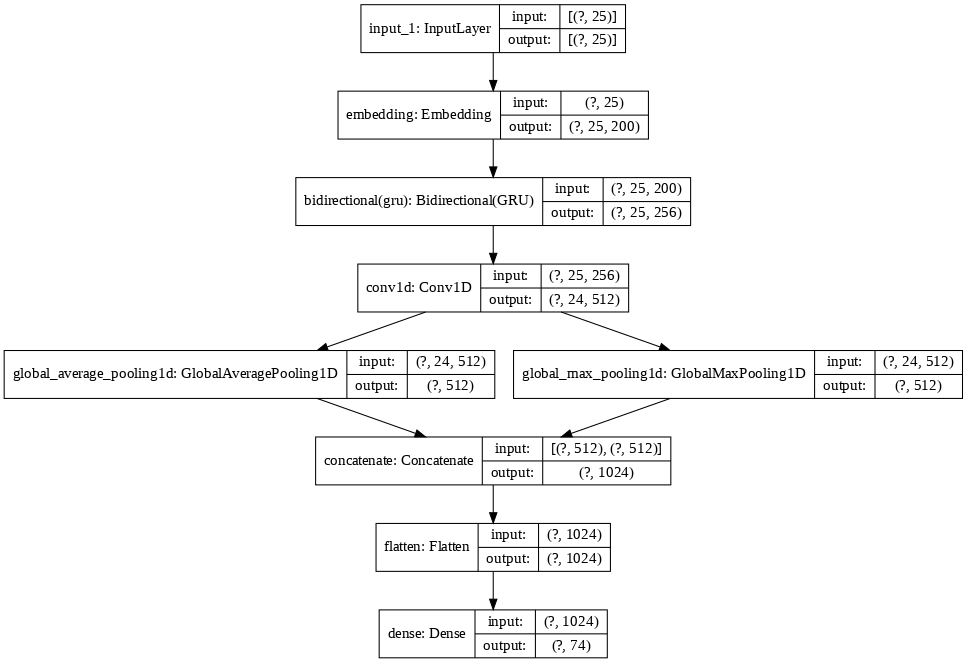

In [0]:
# defining model - GRU + CNN - Base model without any regularization

modelname= 'Bidirectional GRU+CNN'

# CNN specific parameters

filter_size = 2
num_filters = 512

# clearing the session and seeding randomness

clear_session()
np.random.seed(seed)
random.set_seed(seed)

# defining the model

inputs = Input(shape=(input_length,), dtype='int32')
embedding = Embedding(input_dim=input_dim,output_dim=output_dim,weights = [embedding_matrix_nn])(inputs)
gru_0 = Bidirectional(GRU(gru_units, return_sequences=True))(embedding)
conv_0 = Conv1D(num_filters, kernel_size = filter_size, padding = "valid", kernel_initializer = "he_uniform")(gru_0)
avg_pool = GlobalAveragePooling1D()(conv_0)
max_pool = GlobalMaxPooling1D()(conv_0)
conc = Concatenate(axis=1)([avg_pool, max_pool])
flatten = Flatten()(conc)
output = Dense(units=74, activation='softmax')(flatten)

model = Model(inputs=inputs, outputs=output)


model.compile(loss=loss,optimizer=optimizer, metrics=metrics_model) 

# printing the model summary

print('Model Summary -',modelname,end='\n\n')
print(model.summary())

# viewing the model architecure visually

plot_model(model, to_file=modelname+'.png', show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=True, dpi=75)

Epoch 1/50
212/212 - 4s - loss: 5.5301 - accuracy: 0.1184 - val_loss: 3.3076 - val_accuracy: 0.1582
Epoch 2/50
212/212 - 3s - loss: 2.7039 - accuracy: 0.3118 - val_loss: 3.0524 - val_accuracy: 0.2857
Epoch 3/50
212/212 - 3s - loss: 1.0377 - accuracy: 0.4454 - val_loss: 2.8561 - val_accuracy: 0.3264
Epoch 4/50
212/212 - 3s - loss: 0.5640 - accuracy: 0.5575 - val_loss: 2.0637 - val_accuracy: 0.4492
Epoch 5/50
212/212 - 3s - loss: 0.3845 - accuracy: 0.6507 - val_loss: 2.2720 - val_accuracy: 0.4498
Epoch 6/50
212/212 - 3s - loss: 0.3261 - accuracy: 0.6721 - val_loss: 2.0699 - val_accuracy: 0.4746
Epoch 7/50
212/212 - 3s - loss: 0.2895 - accuracy: 0.6802 - val_loss: 2.3293 - val_accuracy: 0.4392
Epoch 8/50
212/212 - 3s - loss: 0.2506 - accuracy: 0.7243 - val_loss: 2.1103 - val_accuracy: 0.5136
Epoch 9/50
212/212 - 3s - loss: 0.2360 - accuracy: 0.7579 - val_loss: 2.0788 - val_accuracy: 0.4982
Epoch 10/50
212/212 - 3s - loss: 0.2130 - accuracy: 0.7667 - val_loss: 1.9547 - val_accuracy: 0.5384

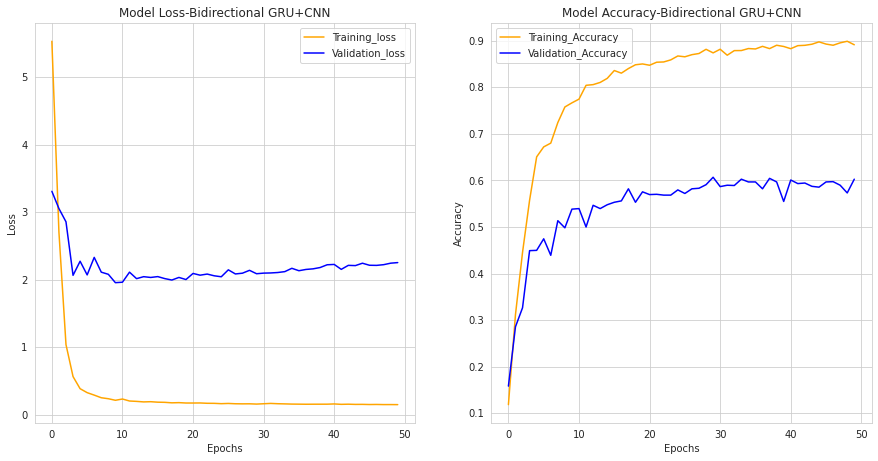

*** Evaluation Results - Bidirectional GRU+CNN ***

Test Accuracy  :60.27 %

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       794
           1       0.29      0.33      0.31         6
           2       0.48      0.46      0.47        46
           3       0.28      0.28      0.28        39
           4       0.53      0.43      0.47        21
           5       0.56      0.40      0.47        25
           6       0.59      0.38      0.46        34
           7       0.50      0.53      0.51        17
           8       0.83      0.47      0.60       129
           9       0.28      0.23      0.26        47
          10       0.67      0.40      0.50        30
          11       0.29      0.40      0.33         5
          12       0.57      0.53      0.55        57
          13       0.47      0.48      0.47        29
          14       0.50      0.38      0.43        26
          15       0.50      0.25  

In [0]:
# fitting the model - GRU + CNN - Base model without any regularization

start_time=time.time()
model.fit(X_train, y_train,validation_data=(X_test,y_test),shuffle=True,epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=2,class_weight=d_class_weights)
et=round(time.time()-start_time,2)
print()
print('Model fit completed in',et, 'seconds')

# printing the graph to visualize the loss and accuracy movement in training and test epoch runs

train_loss=val_loss=train_acc=val_acc=None
train_loss = model.history.history['loss']
val_loss   = model.history.history['val_loss']
train_acc  = model.history.history['accuracy']
val_acc    = model.history.history['val_accuracy']

show_graph(train_loss,val_loss,train_acc,val_acc) 

# evaluating the  model 

score, acc = model.evaluate(X_test, y_test,batch_size=BATCH_SIZE,verbose=0)

# getting prediction values for X_test 

y_pred = model.predict(X_test, verbose=0)
y_pred_1D = np.argmax(y_pred, axis=1)

# evaluating the model (using sklearn metrics)

accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_test_1D,y_pred_1D)

# printing key metrics

print('*** Evaluation Results -',modelname,'***',end='\n\n')
print('Test Accuracy  :%0.2f' %(acc*100),'%',end='\n\n')
print('Classification Report:')
print(metrics.classification_report(y_test_1D,y_pred_1D),end='\n\n')

# storing the model output in dataframe for comparison purpose

storeresult (modelname,'Class balanced;Glove trained',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score) 

#### 4.2.5 SVC Classification Model

Note:

1.   We will create fresh embeddings ( using Glove) using 50 dimension, as higher dimension for SVC will create 'curse of dimensionality' effect.
1.   Even with 50 dimension vector, the feature size will be 25*50 ( i.e 1250) which will then be pruned using PCA.
1.   PCA reducted features will then be put though the model. 

In [0]:
# getting the vocabulary size

vocab_size = max(list(word_index.values())) + 1
print('Vocabulary size:',vocab_size)

Vocabulary size: 5698


In [0]:
# setting embedding size

embedding_size = 50

# getting the glove 6B 50 vector weights - reading the appropriate file and creating embedding dict

EMBEDDING_FILE = "glove.6B.50d.txt"

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    embeddings[word] = embd

# creating embedding matrix

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)

(5698, 50)


In [0]:
# printing embedding matrix for one sample 

print(embedding_matrix[999])

[-0.14743    -1.34420002  1.36930001 -0.64117002 -0.73799002 -0.72350001
  0.28341001 -0.44613001 -0.37433001  0.82082999  0.40268001  0.71135002
 -0.20439    -0.064768   -0.059357    0.58727998 -0.52613997  0.11215
  1.77160001 -0.46560001 -0.64797002  0.49671999 -0.63708001 -0.19203
  0.75686002  0.45804     0.36120999 -0.55245     0.41040999 -0.84797001
  0.083845    0.50421    -1.62080002  0.1663     -0.23679     1.11189997
  0.73084998 -0.24345     0.63492    -0.34031999  0.55738002 -0.0091175
 -0.64526999  0.33866999 -0.85417998  0.89977002  0.49970999 -0.48473001
 -0.082842   -0.59403998]


In [0]:
 #defining model - Embedding

# common embedding parameters for the model
input_dim=vocab_size
output_dim=embedding_size
input_length=maxlen

# clearing the session and seeding randomness

clear_session()
np.random.seed(seed)
random.set_seed(seed)

# define Base model
embed_model = Sequential() 
embed_model.add(Embedding(input_dim=input_dim,output_dim=output_dim,input_length=input_length,weights = [embedding_matrix]))
embed_model.add(Flatten())


# compile Base model
embed_model.compile(loss=loss,optimizer=optimizer, metrics=metrics_model) 

for layer in embed_model.layers:
  layer.trainable = False

print('Model Summary - Embedding output',end='\n\n')
print(embed_model.summary())

Model Summary - Embedding output

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            284900    
_________________________________________________________________
flatten (Flatten)            (None, 1250)              0         
Total params: 284,900
Trainable params: 0
Non-trainable params: 284,900
_________________________________________________________________
None


In [0]:
# converting the text to sequence and padding based on the parameter length setup

X = tokenizer.texts_to_sequences(mydata['cleaned_description'])
X = pad_sequences(X, maxlen = maxlen,padding='post')
y_1D = np.asarray(mydata['Group'])

In [0]:
# predicting embedding for X

embeddings=embed_model.predict(X)
print("Shape of embeddings : ",embeddings.shape)
X_emb=np.asarray(embeddings)
print('X_emb dataset shape:',X_emb.shape)

Shape of embeddings :  (8467, 1250)
X_emb dataset shape: (8467, 1250)


In [0]:
# checking 1 record from the dataset

print('Record at Index # 0 for X:', X[0],end='\n\n')

print('Record at Index # 0 for y_1D:',y_1D[0],end='\n\n')

print('Record at Index # 0 for X_emb:',X_emb[0],end='\n\n')

Record at Index # 0 for X: [ 25  10 109 125 172  58  23 256 199   8   2 428  45 257 203  99  32 177
   0   0   0   0   0   0   0]

Record at Index # 0 for y_1D: 0

Record at Index # 0 for X_emb: [0.28227  0.018936 1.0055   ... 0.       0.       0.      ]



In [0]:
#creating train test split

X_train2,X_test2,y_train2,y_test2 = train_test_split(X_emb,y_1D,test_size=0.2,random_state=100,shuffle=True)

# checking the shape of dataset 

print('X_train2 dataset shape:',X_train2.shape)
print('y_train2 dataset shape:',y_train2.shape)
print('X_test2 dataset shape:',X_test2.shape)
print('y_test2 dataset shape:',y_test2.shape)

X_train2 dataset shape: (6773, 1250)
y_train2 dataset shape: (6773,)
X_test2 dataset shape: (1694, 1250)
y_test2 dataset shape: (1694,)


In [0]:
#checking if all the classes ( target ) have been represented in the train dataset

values, counts = np.unique(y_train2, return_counts=True)
print(values)
print(counts)

['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49'
 '5' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61' '62'
 '63' '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '8' '9']
[3180   25  110   25  200  116   92   31   60   67   72  164  195   29
   23   19   19  234   92   50   16   38   74  161   18   57    3   85
   55    2   14   13    3   15   79   35   29   31    4   12   29    4
   19    5    4  104   11    6    6    8    2    7    2    1    3    6
  150   18    2   22    3    1    8    2    2    3    2   51    2    2
    2    2  532  205]


In [0]:
# applying scaling  

sc= StandardScaler()
X_train2= sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [0]:
# applying PCA for 95% confidence level

pca = PCA(.95)
X_train_pca = pca.fit_transform(X_train2)
X_test_pca = pca.transform(X_test2)

print("Number of features for 0.95 confidence level is: %s" % pca.n_components_ ,end='\n\n\n')

Number of features for 0.95 confidence level is: 731




In [0]:
# reducing the number of features to 731 principal components and computing updated X_train and X_test using dot product of transpose matrix

P_reduce = np.array(pca.components_)
X_train_pca = np.dot(X_train2,P_reduce.T)
X_test_pca = np.dot(X_test2,P_reduce.T)
print('Number of features post PCA:',len(P_reduce))

print('Shape of training features data  before PCA is:',X_train2.shape)
print('Shape of training features data  after PCA is:',X_train_pca.shape)
print('Shape of testing features data  before PCA is:',X_test2.shape)
print('Shape of testing features data  after PCA is:',X_test_pca.shape)

Number of features post PCA: 731
Shape of training features data  before PCA is: (6773, 1250)
Shape of training features data  after PCA is: (6773, 731)
Shape of testing features data  before PCA is: (1694, 1250)
Shape of testing features data  after PCA is: (1694, 731)


In [0]:
# defining model - SVC - Base model without any tuning

modelname='SVC'

#setting up run parameters

kernel = 'rbf'

# defining the model

start_time=time.time()
model = SVC(kernel=kernel, random_state = seed,class_weight='balanced',C= 10, gamma= 0.01)
model.fit(X_train_pca, y_train2.ravel()) 
et=round(time.time()-start_time,2)
print('Model fit completed in',et, 'seconds',end='\n\n') 

# getting prediction values for X_test 

y_predict = model.predict(X_test_pca)

# evaluating the model (using sklearn metrics)

accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_test2,y_predict)

# printing key metrics

print('*** Evaluation Results -',modelname,'***',end='\n\n')
print('Test Accuracy  :%0.2f' %(accuracy_score*100),'%',end='\n\n')
print('Classification Report:')
print(metrics.classification_report(y_test2, y_predict),end='\n\n')

# storing the model output in dataframe for comparison purpose

storeresult (modelname,'Class balanced;Glove;PCA',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score)

Model fit completed in 591.34 seconds

*** Evaluation Results - SVC ***

Test Accuracy  :51.53 %

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.95      0.70       794
           1       0.00      0.00      0.00         6
          10       0.83      0.17      0.28        30
          11       0.00      0.00      0.00         5
          12       1.00      0.07      0.13        57
          13       0.00      0.00      0.00        29
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00        25
          17       1.00      0.71      0.83        14
          18       0.00      0.00      0.00        16
          19       0.00      0.00      0.00        51
           2       0.67      0.04      0.08        46
          20       0.00      0.00      0.00         7
          21       0.00      0.00      0.00         6
          22  

#### 4.2.6 Linear SVC Classification Model

In [0]:
# defining model - Linear SVC - Base model without tuning

modelname = 'Linear SVC'

# defining the model

start_time=time.time()
model = LinearSVC(random_state = seed,class_weight='balanced',C= 1000)
model.fit(X_train_pca, y_train2.ravel()) 
et=round(time.time()-start_time,2)
print('Model fit completed in',et, 'seconds',end='\n\n') 

# getting prediction values for X_test

y_predict = model.predict(X_test_pca)

# evaluating the model (using sklearn metrics)

accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_test2,y_predict)

# printing key metrics

print('*** Evaluation Results -',modelname,'***',end='\n\n')
print('Test Accuracy  :%0.2f' %(accuracy_score*100),'%',end='\n\n')
print('Classification Report:')
print(metrics.classification_report(y_test2, y_predict),end='\n\n')

# storing the model output in dataframe for comparison purpose

storeresult (modelname,'Class balanced;Glove;PCA',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score)

Model fit completed in 251.63 seconds

*** Evaluation Results - Linear SVC ***

Test Accuracy  :41.44 %

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       794
           1       0.00      0.00      0.00         6
          10       0.37      0.23      0.29        30
          11       0.00      0.00      0.00         5
          12       0.21      0.21      0.21        57
          13       0.15      0.07      0.10        29
          14       0.08      0.04      0.05        26
          15       0.00      0.00      0.00         8
          16       0.50      0.08      0.14        25
          17       1.00      1.00      1.00        14
          18       0.14      0.06      0.09        16
          19       0.09      0.14      0.11        51
           2       0.18      0.26      0.21        46
          20       0.33      0.14      0.20         7
          21       0.00      0.00      0.00         6
       

#### 4.2.7 Ensemble Classification Models

##### 4.2.7.1 RandomForest Classification Model

In [0]:
# defining model - Random Forest without tuning

modelname = 'RandomForestClassifier'

# defining the model

start_time=time.time()
model = RandomForestClassifier(random_state=seed,class_weight='balanced')
model.fit(X_train_pca, y_train2.ravel()) 
et=round(time.time()-start_time,2)
print('Model fit completed in',et, 'seconds',end='\n\n') 

# getting prediction values for X_test 

y_predict = model.predict(X_test_pca)

# evaluating the model (using sklearn metrics)

accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_test2,y_predict)

# printing key metrics

print('*** Evaluation Results -',modelname,'***',end='\n\n')
print('Test Accuracy  :%0.2f' %(accuracy_score*100),'%',end='\n\n')
print('Classification Report:')
print(metrics.classification_report(y_test2, y_predict),end='\n\n')

# storing the model output in dataframe for comparison purpose

storeresult (modelname,'Class balanced;Glove;PCA',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score)

Model fit completed in 81.15 seconds

*** Evaluation Results - RandomForestClassifier ***

Test Accuracy  :51.89 %

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.97      0.70       794
           1       0.00      0.00      0.00         6
          10       0.83      0.17      0.28        30
          11       0.00      0.00      0.00         5
          12       1.00      0.05      0.10        57
          13       0.00      0.00      0.00        29
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00        25
          17       1.00      0.86      0.92        14
          18       0.00      0.00      0.00        16
          19       0.00      0.00      0.00        51
           2       1.00      0.07      0.12        46
          20       0.00      0.00      0.00         7
          21       0.00      0.00      0.00       

##### 4.2.7.2 XGBoost Classification Model

In [0]:
# since XGB classifier does not take automatic class balancing with parameter , the weights need to be provided as input to the model.
# unlike neural network models that take class weight as input parameter, XGBclassifier needs to be given class weights transformed at sample level
# hence class_weight2 is computed first based on y_train2 lables and later weights array (w_array2) is provided to give sample level weights
# since this is given at sample level the length of this weight array will be the length of sample (train), unlike class weights which is at class level


# calculating class weight based on y_train2 

class_weights2 = class_weight.compute_class_weight('balanced', np.unique(y_train2), y_train2)

# calculating class weight based on y_train2 
w_array2 = np.ones(y_train2.shape[0], dtype = 'float')
for i, val in enumerate(y_train2):
    val_int = int(val)
    w_array2[i] = class_weights2[val_int-1]

print('Length of class weights is:',len(class_weights2))
print('Length of sample weights is:',len(w_array2))
print('Length of sample is:',len(y_train2))    

Length of class weights is: 74
Length of sample weights is: 6773
Length of sample is: 6773


In [0]:
# defining model - XGBoost without tuning

modelname = 'XGBClassifier'

# defining the model - limiting n_estimators to 20

start_time=time.time()
model = XGBClassifier(n_estimators=20,random_state=seed,sample_weight=w_array2)
model.fit(X_train_pca, y_train2.ravel()) 
et=round(time.time()-start_time,2)
print('Model fit completed in',et, 'seconds',end='\n\n') 

# getting prediction values for X_test 

y_predict = model.predict(X_test_pca)

# evaluating the model (using sklearn metrics)

accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_test2,y_predict)

# printing key metrics

print('*** Evaluation Results -',modelname,'***',end='\n\n')
print('Test Accuracy  :%0.2f' %(accuracy_score*100),'%',end='\n\n')
print('Classification Report:')
print(metrics.classification_report(y_test2, y_predict),end='\n\n')

# storing the model output in dataframe for comparison purpose

storeresult (modelname,'Class balanced;Glove;PCA',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score)

Model fit completed in 304.36 seconds

*** Evaluation Results - XGBClassifier ***

Test Accuracy  :56.08 %

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.99      0.71       794
           1       0.00      0.00      0.00         6
          10       0.83      0.17      0.28        30
          11       0.00      0.00      0.00         5
          12       0.75      0.05      0.10        57
          13       0.00      0.00      0.00        29
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00        25
          17       1.00      0.93      0.96        14
          18       0.00      0.00      0.00        16
          19       0.00      0.00      0.00        51
           2       0.50      0.07      0.12        46
          20       0.00      0.00      0.00         7
          21       0.00      0.00      0.00         6
    

### 4.3.Models based on Transformers

Data preparation and function setup for transformer models:

In [0]:
# preparating dataframe with appropriate column names

mydata_tm = mydata.copy(deep=True)
mydata_tm.rename(columns={"cleaned_description": "text", "Group": "labels"},inplace=True)
mydata_tm['labels'] = mydata_tm['labels'].astype('int64')

# creating train and test dataframes

train_df, eval_df = train_test_split(mydata_tm,test_size=tt_split,random_state=tt_seed)

print('train_df dataset shape:',train_df.shape)
print('eval_df dataset shape:',eval_df.shape)

train_df dataset shape: (6773, 2)
eval_df dataset shape: (1694, 2)


In [0]:
# creating class weight for handling class imbalance issue 

y_train_lst=train_df.values[:,1]
class_weights_tm = class_weight.compute_class_weight('balanced', np.unique(y_train_lst), y_train_lst)
class_weights_lst = class_weights_tm.tolist()

print(class_weights_lst)

[0.028782083970763216, 3.661081081081081, 0.46936936936936935, 0.5684908510995468, 1.1585699623674308, 0.8800675675675675, 0.6101801801801802, 1.7946475887652358, 0.17204328388538914, 0.44647330257086354, 0.832063882063882, 3.661081081081081, 0.45763513513513515, 0.7890260950605779, 0.9948589894242068, 2.9524847428073233, 1.5254504504504505, 1.3660750302541347, 1.2712087087087087, 0.5580916282135794, 3.1561043802423114, 3.9794359576968272, 4.817211948790896, 4.817211948790896, 0.3911411411411411, 0.9948589894242068, 1.8305405405405406, 5.7204391891891895, 2.408605974395448, 1.2368517165814463, 5.084834834834835, 1.6057373162636321, 30.50900900900901, 1.0767885532591415, 1.664127764127764, 45.763513513513516, 6.537644787644788, 7.04054054054054, 30.50900900900901, 6.101801801801802, 2.615057915057915, 3.1561043802423114, 2.9524847428073233, 22.881756756756758, 7.627252252252252, 3.1561043802423114, 22.881756756756758, 4.817211948790896, 18.305405405405406, 22.881756756756758, 8.32063882

In [0]:
# creating function to generate evaluation metrics

def f1_multiclass(labels, preds):
    return metrics.f1_score(labels, preds, average='weighted')

def prec_multiclass(labels, preds):
    return metrics.precision_score(labels, preds, average='weighted')

def rec_multiclass(labels, preds):
    return metrics.recall_score(labels, preds, average='weighted') 

def acc_score(labels, preds):
    return metrics.accuracy_score(labels, preds) 

In [0]:
# creating function to create,train and evaluate transformer models based on input parameters

def cte_transformermodels(model_type,model_name,train_df,eval_df):

  train_args = {
    'manual_seed': seed,
    'output_dir': f"outputs/{model_type}",
    'best_model_dir': f"outputs/{model_type}/best_model",    
    'max_seq_length': 128,
    'num_train_epochs': 5,
    'train_batch_size': 8,
    'eval_batch_size': 8,
    'gradient_accumulation_steps': 1,
    'learning_rate': 4e-5,
    'evaluate_during_training': True,
    'evaluate_during_training_steps': 847,
    'save_eval_checkpoints': False,
    'save_steps': 10000,            
    'reprocess_input_data': True,
    'save_model_every_epoch': False,
    'overwrite_output_dir': True,
    'no_cache': True,
    'use_early_stopping': True,
    'early_stopping_patience': 2,
    }

  # Create the model

  model = ClassificationModel(model_type, model_name, num_labels=74,  weight=class_weights_lst,args=train_args)
  
  # Train the model

  model.train_model(train_df, eval_df=eval_df,show_running_loss=True)
  
  # Evaluate the model

  result, model_outputs, wrong_predictions = model.eval_model(eval_df, f1=f1_multiclass,prec=prec_multiclass,rec=rec_multiclass, acc=acc_score)

  return result

#### 4.3.1 BERT Classification Model

In [0]:
# executing BERT classification model 

start_time=time.time()
bert_result = cte_transformermodels('bert', 'bert-base-uncased',train_df,eval_df)
et=round(time.time()-start_time,2)
print('Model fit completed in',et, 'seconds',end='\n\n') 

# printing key metrics

print('*** Evaluation Results - BERT ***',end='\n\n')
print(bert_result)

# storing the model output in dataframe for comparison purpose

storeresult('BERT','Class balanced',round(bert_result["acc"],3),round(bert_result["mcc"],3),\
            round(bert_result["prec"],3),round(bert_result["rec"],3),round(bert_result["f1"],3))


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.631352Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 4.155474Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 4.367149Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 3.821042Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Running loss: 3.772318


Running loss: 2.639477Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 2048.0
Running loss: 1.969694


Running loss: 2.968939


Running loss: 0.293245


Running loss: 0.737475




Model fit completed in 886.18 seconds

*** Evaluation Results - BERT ***

{'mcc': 0.5354575930733183, 'f1': 0.6347460133928933, 'prec': 0.6851021391234532, 'rec': 0.6216056670602125, 'acc': 0.6216056670602125, 'eval_loss': 2.223339770832714}


#### 4.3.2 XLNet Classification Model

In [0]:
# executing XLNet classification model 

start_time=time.time()
xlnet_result = cte_transformermodels('xlnet', 'xlnet-base-cased',train_df,eval_df)
et=round(time.time()-start_time,2)
print('Model fit completed in',et, 'seconds',end='\n\n') 

# printing key metrics

print('*** Evaluation Results - XLNet ***',end='\n\n')
print(xlnet_result)

# storing the model output in dataframe for comparison purpose

storeresult('XLNet','Class balanced',round(xlnet_result["acc"],3),round(xlnet_result["mcc"],3),\
            round(xlnet_result["prec"],3),round(xlnet_result["rec"],3),round(xlnet_result["f1"],3))


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.094149Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 4.802681Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 4.951695Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 4.733527Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Running loss: 4.410978Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 2048.0
Running loss: 7.389560


Running loss: 1.030205


Running loss: 1.743278


Running loss: 2.165720


Running loss: 0.069554




Model fit completed in 1187.01 seconds

*** Evaluation Results - XLNet ***

{'mcc': 0.5276176678890678, 'f1': 0.6324880082087421, 'prec': 0.6939683208233668, 'rec': 0.6127508854781583, 'acc': 0.6127508854781583, 'eval_loss': 2.265402667927292}


#### 4.3.3 ELECTRA Classification Model

In [0]:
# executing ELECTRA classification model 

start_time=time.time()
electra_result = cte_transformermodels('electra', 'google/electra-base-discriminator',train_df,eval_df)
et=round(time.time()-start_time,2)
print('Model fit completed in',et, 'seconds',end='\n\n') 

# printing key metrics

print('*** Evaluation Results - ELECTRA ***',end='\n\n')
print(electra_result)

# storing the model output in dataframe for comparison purpose

storeresult('ELECTRA','Class balanced',round(electra_result["acc"],3),round(electra_result["mcc"],3),\
            round(electra_result["prec"],3),round(electra_result["rec"],3),round(electra_result["f1"],3))


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.252053Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 3.086957Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 4.556157Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 2.146967


Running loss: 2.512168


Running loss: 3.479196


Running loss: 0.846142


Running loss: 1.832524Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 0.720655




Model fit completed in 991.45 seconds

*** Evaluation Results - ELECTRA ***

{'mcc': 0.4695976784121718, 'f1': 0.5810088388733315, 'prec': 0.6559953046654972, 'rec': 0.5554899645808736, 'acc': 0.5554899645808736, 'eval_loss': 2.3680542819904833}


#### 4.3.4 RoBERTa Classification Model

In [0]:
# executing RoBERTa classification model 

start_time=time.time()
roberta_result = cte_transformermodels('roberta', 'roberta-base',train_df,eval_df)
et=round(time.time()-start_time,2)
print('Model fit completed in',et, 'seconds',end='\n\n') 

# printing key metrics

print('*** Evaluation Results - RoBERTa ***',end='\n\n')
print(xlnet_result)

# storing the model output in dataframe for comparison purpose

storeresult('RoBERTa','Class balanced',round(roberta_result["acc"],3),round(roberta_result["mcc"],3),\
            round(roberta_result["prec"],3),round(roberta_result["rec"],3),round(roberta_result["f1"],3))


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.551687Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 4.081795Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 3.758199Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 2.755450Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Running loss: 2.539605


Running loss: 1.538463


Running loss: 3.119943


Running loss: 1.558159Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Running loss: 2.201445


Running loss: 1.803754




Model fit completed in 1067.24 seconds

*** Evaluation Results - RoBERTa ***

{'mcc': 0.5276176678890678, 'f1': 0.6324880082087421, 'prec': 0.6939683208233668, 'rec': 0.6127508854781583, 'acc': 0.6127508854781583, 'eval_loss': 2.265402667927292}


### 4.4.Comparison of model performance

In [0]:
# displaying comparative metrics of all models evaluated so far - highest value for a metric highlighted in yellow

df_result.style.set_table_styles([dict(selector='th',props=[('text-align','center')])]).hide_index()\
                    .highlight_max(axis=0)\
                    .format("{:.2%}",subset=['Accuracy','Precision','Recall','F1'])

Model,Variant,Accuracy,MCC,Precision,Recall,F1
Multinomial NB,Count Vector,61.33%,0.440000,54.11%,61.33%,50.99%
Multinomial NB,WordLevel TF-IDF,57.44%,0.366000,42.71%,57.44%,44.03%
Multinomial NB,N-Gram TF-IDF,58.15%,0.381000,48.99%,58.15%,45.95%
Multinomial NB,CharLevel TF-IDF,56.49%,0.347000,42.95%,56.49%,42.88%
SVC,Count Vector,61.04%,0.434000,56.10%,61.04%,50.32%
SVC,WordLevel TF-IDF,62.51%,0.460000,60.59%,62.51%,53.62%
SVC,N-Gram TF-IDF,59.80%,0.412000,56.55%,59.80%,50.48%
SVC,CharLevel TF-IDF,63.64%,0.479000,56.91%,63.64%,54.62%
RandomForestClassifier,Count Vector,63.64%,0.480000,58.81%,63.64%,56.54%
RandomForestClassifier,WordLevel TF-IDF,65.41%,0.509000,64.05%,65.41%,58.85%


**Inference**:


1.   Model performance is compared on 5 metrics - Accuracy, Matthews Correlation Coeff.(MCC),Precision,Recall and F1.
2.   Since the dataset is highly unbalanced, Accuracy will not be appropriate measure to compare the model performance. MCC is a better metrics to compare in unbalanced dataset cases.
3.   Additionally weighted avg. precision, recall , F1 is also relevant for comparison.
4.   Models run on unbalanced dataset , without class balancing, tend to give higher accuracy and recall measure (e.g. XGB based on CountVector) however this is misleading since class balancing issue is not addressed.
5.   Since F1 combines the impact of precision and recall, MCC and F1 together may be considered appropriate to measure the model performance.

In [0]:
# displaying comparative metrics of all models where class balancing was done- highest value for a metric highlighted in yellow

df_result[df_result['Variant'].str.contains("Class balanced")].style.set_table_styles([dict(selector='th',props=[('text-align','center')])]).hide_index()\
                    .highlight_max(axis=0)\
                    .format("{:.2%}",subset=['Accuracy','Precision','Recall','F1'])

Model,Variant,Accuracy,MCC,Precision,Recall,F1
Bidirectional-LSTM,Class balanced;Glove trained,59.80%,0.477000,65.05%,59.80%,61.28%
Bidirectional-GRU,Class balanced;Glove trained,58.44%,0.462000,63.52%,58.44%,60.02%
CNN,Class balanced;Glove trained,57.50%,0.446000,61.72%,57.50%,58.47%
Bidirectional GRU+CNN,Class balanced;Glove trained,60.27%,0.478000,64.45%,60.27%,61.41%
SVC,Class balanced;Glove;PCA,51.53%,0.259000,46.15%,51.53%,41.74%
Linear SVC,Class balanced;Glove;PCA,41.44%,0.271000,48.17%,41.44%,43.49%
RandomForestClassifier,Class balanced;Glove;PCA,51.89%,0.261000,47.73%,51.89%,41.58%
XGBClassifier,Class balanced;Glove;PCA,56.08%,0.339000,42.86%,56.08%,43.94%
BERT,Class balanced,62.20%,0.535000,68.50%,62.20%,63.50%
XLNet,Class balanced,61.30%,0.528000,69.40%,61.30%,63.20%


**Inference**:


1.   Classic ML models are not giving good results. This may be because advanced NLP techniques have evolved over a period and new architectures based on neural networks are shown to give better results.
2.   Linear SVC performs extremely poor , though we need to consider the fact that all the above models are run without any hyperparameter tuning.
3.   Though ensembels give better results compared to classic ML models, they fall short when compared with neural network based models because of the evolution in advanced NLP techniques and architectures that are giving superior results.
4.   While LSTMs and GRUs are giving superior MCC and F1 results compared to classic ML/ Ensembles, the CNN architectures are also being explored in the world of NLP and as seen above CNNs also give equally good results.
5.   Similar with ensemble approach, blended models ( GRU+CNNs) are also giving good results and infact, the highest MCC and F1 ( amoung neural network) is based on blended model approach where GRU and CNN architectures are combined.
6.  NLP is growing very fast interms of research and findings and last couple of years has seen advent of transformer based models, starting with BERT.
7.  As seen from the above table, BERT has given the best result across most of the parameters and esp. MCC and F1.
8.  Over the last year, several developments have been done based on BERT and additional architectures like RoBERTa,XLNet,ELECTRA is being applied for various specialized NLP tasks and as seen from above, XLNet has given the best precision value across all models, and not very far from BERT interms of MCC and F1.
9. While the test metrics above may not be very excellent, one needs to consider the fact that the dataset has many data quality issues , inconsistencies which affects any model performance.
10. Infact most of the neural network models showed training accuracy around 90% which shows that the models overfitted on the data and there is opportunity to tune the parameters for better results.



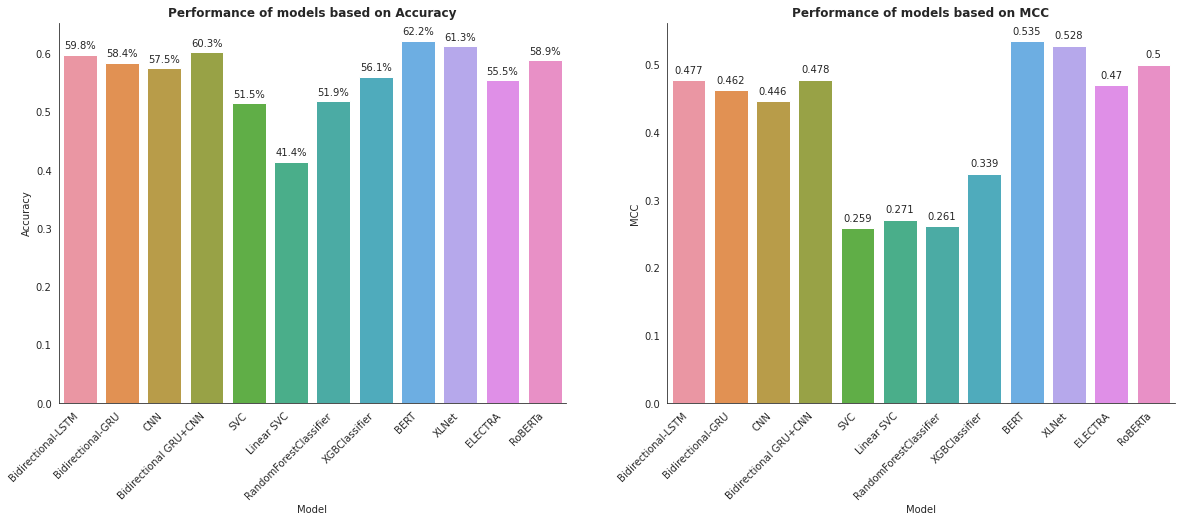

In [0]:
# displaying how models fare based on Accuracy and MCC measure - visual representation.
# for this purpose only those models that are class balanced considered for proper comparison.

sns.set_style('white')

fig, ax =plt.subplots(1,2)
g=sns.barplot(data=df_result[df_result['Variant'].str.contains("Class balanced")], x = 'Model', y = 'Accuracy', ax=ax[0])
ax[0].set_title('Performance of models based on Accuracy', fontweight='bold')
i=sns.barplot(data=df_result[df_result['Variant'].str.contains("Class balanced")], x = 'Model', y = 'MCC', ax=ax[1])
ax[1].set_title('Performance of models based on MCC', fontweight='bold')
plt.gcf().set_size_inches(20, 7)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45,horizontalalignment='right') 

for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.annotate('{:.1%}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center') 

for p in i.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    i.annotate('{:.3}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center')        

fig.show()
sns.despine()

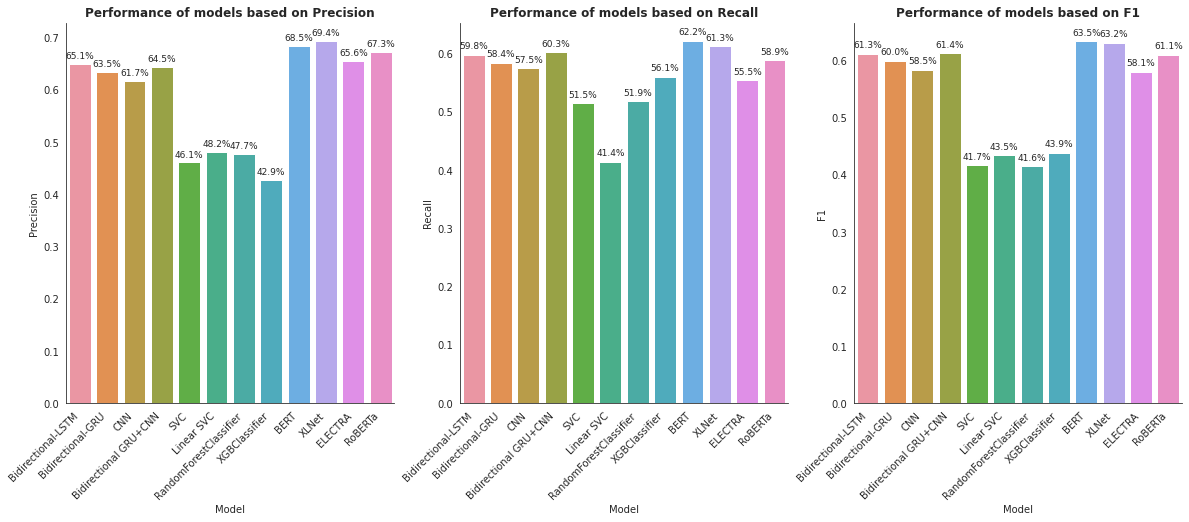

In [0]:
# displaying how models fare based on Precision,Recall and F1 measure - visual representation. 
# for this purpose only those models that are class balanced considered for proper comparison.

sns.set_style('white')
fig, ax =plt.subplots(1,3)
g=sns.barplot(data=df_result[df_result['Variant'].str.contains("Class balanced")], x = 'Model', y = 'Precision', ax=ax[0])
ax[0].set_title('Performance of models based on Precision', fontweight='bold')
i=sns.barplot(data=df_result[df_result['Variant'].str.contains("Class balanced")], x = 'Model', y = 'Recall', ax=ax[1])
ax[1].set_title('Performance of models based on Recall', fontweight='bold')
j=sns.barplot(data=df_result[df_result['Variant'].str.contains("Class balanced")], x = 'Model', y = 'F1', ax=ax[2])
ax[2].set_title('Performance of models based on F1', fontweight='bold')
plt.gcf().set_size_inches(20, 7)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45,horizontalalignment='right') 

for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.annotate('{:.1%}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center', size=9) 

for p in i.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    i.annotate('{:.1%}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center', size=9)  

for p in j.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    j.annotate('{:.1%}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center', size=9)            

fig.show()
sns.despine()

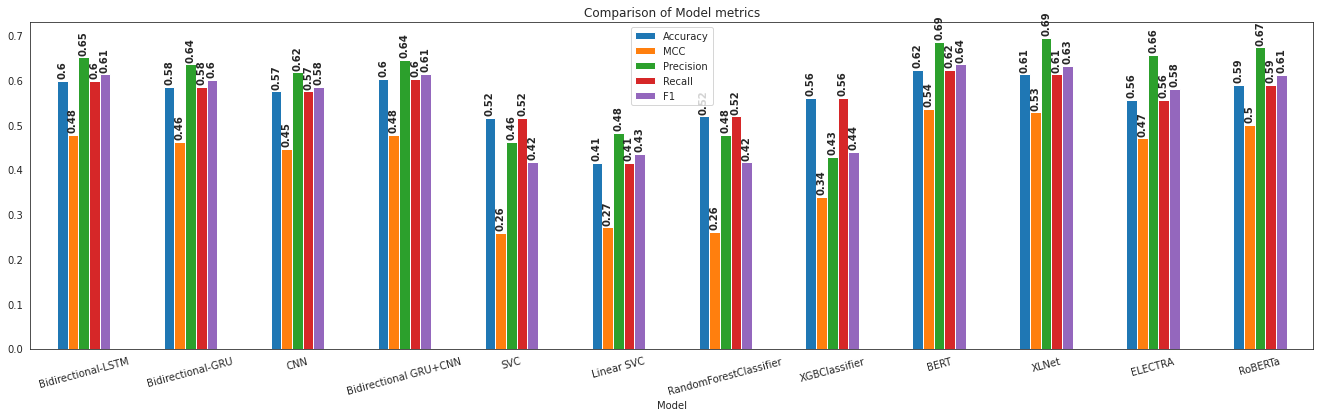

In [0]:
# displaying comparative metrics of all models where class balancing was done - visual representation

sns.set_style('white')   
ax = df_result[df_result['Variant'].str.contains("Class balanced")].plot.bar(x="Model",rot=15,title = 'Comparison of Model metrics',figsize=(23,6))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center', rotation=90,fontsize=10,fontweight='bold')

**Summary of this milestone and next steps for final submission**:


1.   Overall, the given dataset was analyzed and several data quality issues, inconsistencies were identified. In addition, the classes were highly imbalanced.
2.   While most of the data quality issue was handled using preprocessing techniques, it still carried residual issues like non-english,inconsistent grouping for similar set of issues etc. These issues are impacting the overall model performance.
3.   Though class balancing was handled using class weights, this skewness in the data shows that either data is insufficient, or some assignment groups are rare ,perhaps because these are steady state stable ares that do not need IT resolution or too many issues are getting reported on too few areas.
4.   Since NLP as an area has many recent evolutions it will be prudent to focus only on selected advanced model architectures (blended as well) for further milestones.
5.   Accordinly we will drop classic ML and ensembles and focus on LSTM,GRU,CNN, blend of these, and transformer models (inc. BERT,XLNet,ELECTRA,RoBERTa etc.) for parameter tuning , regularization etc. During this process we will also consider mix and match of these models e.g. BERT for tokenizer and CNN for classification etc.